In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Calculo perdidas costo fabril - ENEA.xlsx',sheet_name='Muestras_planta')
df.columns

Index(['Nombre MP', 'Peso tara', 'Peso bruto', 'Utensilio', 'Peso perdida',
       'Cantidad', 'Medicion', 'Perdida teorica', '% Error', '% Desv',
       '% Complem', '% Tot', 'Muestreo '],
      dtype='object')

In [6]:
class Grafico:
    
    def __init__(self,df: object, utensilio: str, nombre_mp: str):
        self.df = df
        self.utensilio = utensilio
        self.nombre_mp = nombre_mp
        self.data = self.df[(self.df['Utensilio'] == self.utensilio)&(self.df['Nombre MP'] == self.nombre_mp)]
        self.pp = self.data['Peso perdida']
        self.pt = self.data['Perdida teorica']
        self.dif = self.data['Muestreo ']
        
    def graficar(self):
        datos = 'Cantidad de muestras: '+str(len(self.pp))+' - '+'Min: '+str(round(np.min(self.pp),3))+' kg'+' - '+'Max: '+str(round(np.max(self.pp),3))+' kg'
        fig, ax = plt.subplots(figsize=(10,7))
        sns.scatterplot(x=self.pp,y=self.pp.index,alpha=0.7,hue=self.dif)
        ax.axvline(x=np.mean(self.pp),color='red',linestyle='--',label='Promedio real '+str(round(np.mean(self.pp)*1000,0))+' gr')
        ax.axvline(x=np.mean(self.pt),color='green',linestyle='--',label='Peso teorico '+str(round(np.mean(self.pt)*1000,0))+' gr')
        ax.set_title(str(self.nombre_mp)+' - '+str(self.utensilio)+'\n'+str(datos),size=16)
        ax.set_xlabel('kg',size=18)
        ax.set_ylabel('Muestras',size=18)
        ax.legend()
        ax.grid()

class Grafico_hist(Grafico):

    def graficar_hist(self):
        fig, ax = plt.subplots()
        sns.histplot(self.pp,bins=80,alpha=0.7)
        ax.axvline(x=np.mean(self.pp),color='red',linestyle='--',label='Promedio real '+str(round(np.mean(self.pp)*1000,0))+' gr')
        ax.axvline(x=np.mean(self.pt),color='green',linestyle='--',label='Peso teorico '+str(round(np.mean(self.pt)*1000,0))+' gr')
        ax.set_title(str(self.nombre_mp)+' - '+str(self.utensilio),size=16)
        ax.set_xlabel('kg',size=18)
        ax.set_ylabel('Frecuencia',size=18)
        ax.legend()
        ax.grid()

class Grafico_lineal(Grafico):

     def graficar_lin(self):
        fig, ax = plt.subplots()
        sns.lineplot(x=self.pp.index,y=self.pp)
        ax.axhline(y=np.mean(self.pp),color='red',linestyle='--',label='Promedio real '+str(round(np.mean(self.pp)*1000,0))+' gr')
        ax.axhline(y=np.mean(self.pt),color='green',linestyle='--',label='Peso teorico '+str(round(np.mean(self.pt)*1000,0))+' gr')
        ax.set_title(str(self.nombre_mp)+' - '+str(self.utensilio),size=16)
        ax.set_xlabel('Muestras',size=18)
        ax.set_ylabel('kg',size=18)
        ax.legend()
        ax.grid()

C:\Users\dsaldias\AppData\Local\Temp\ipykernel_23692\2785568705.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,7))


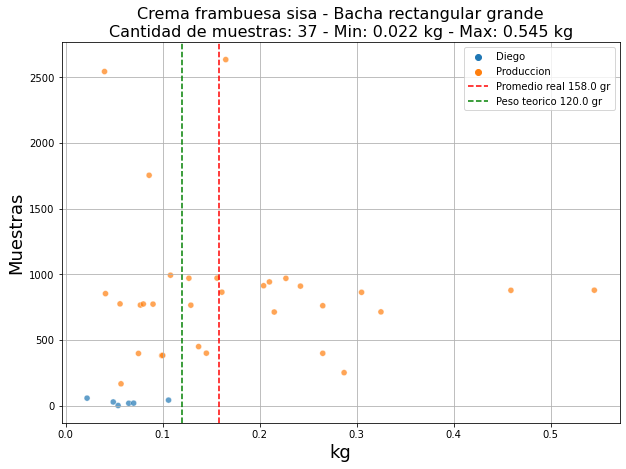

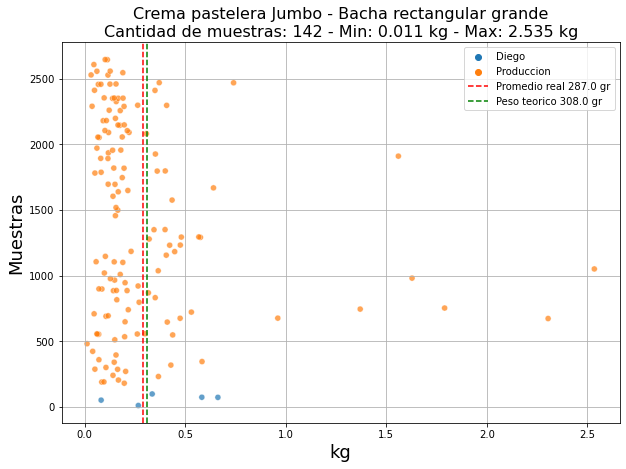

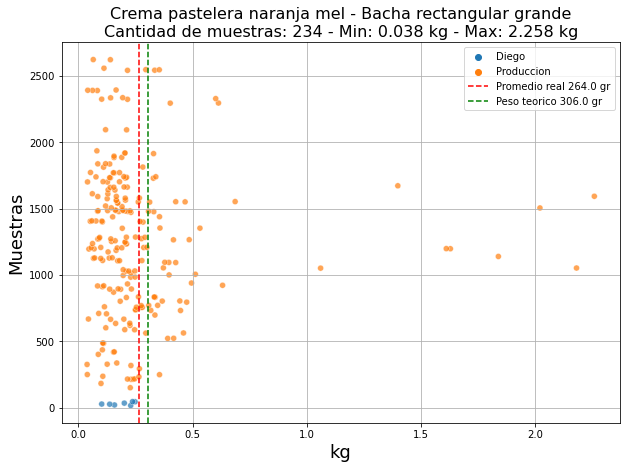

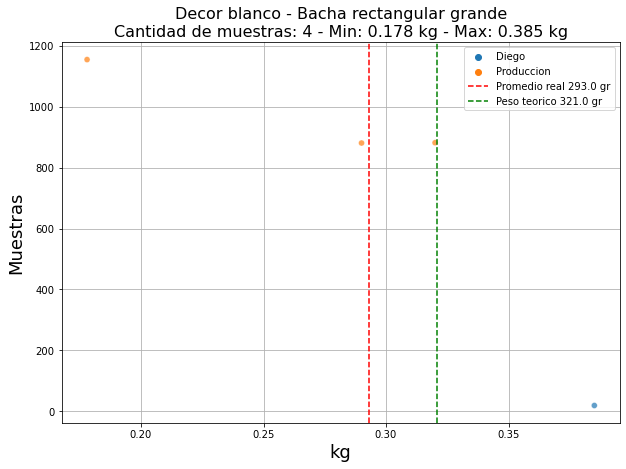

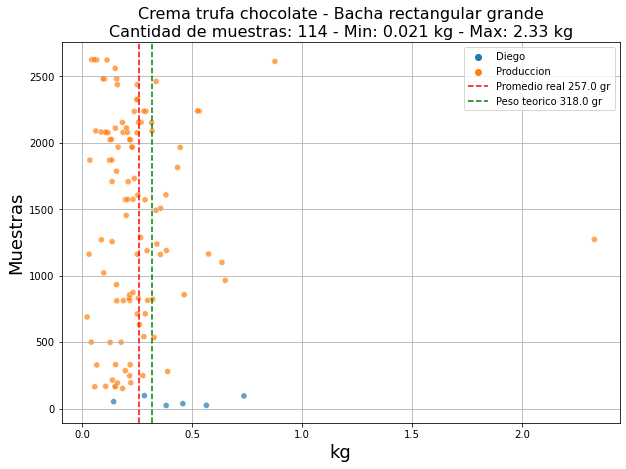

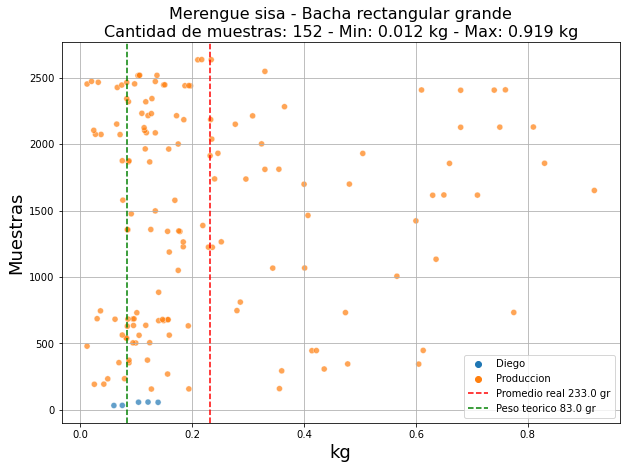

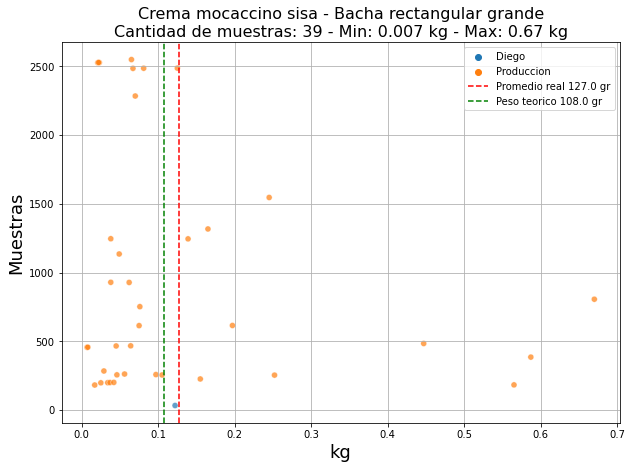

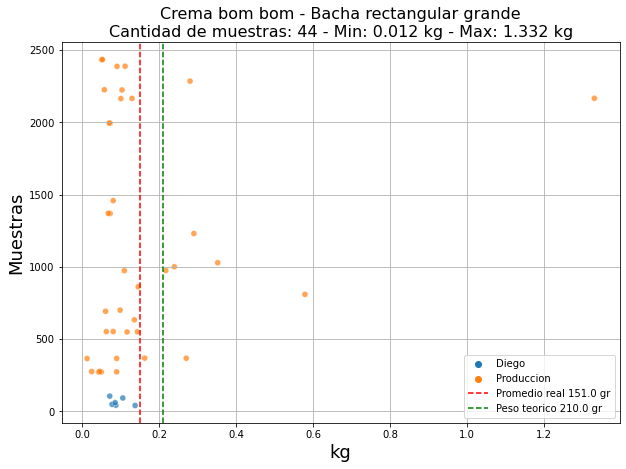

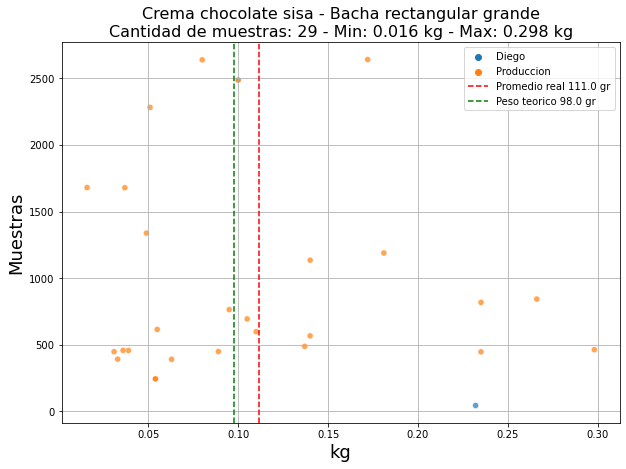

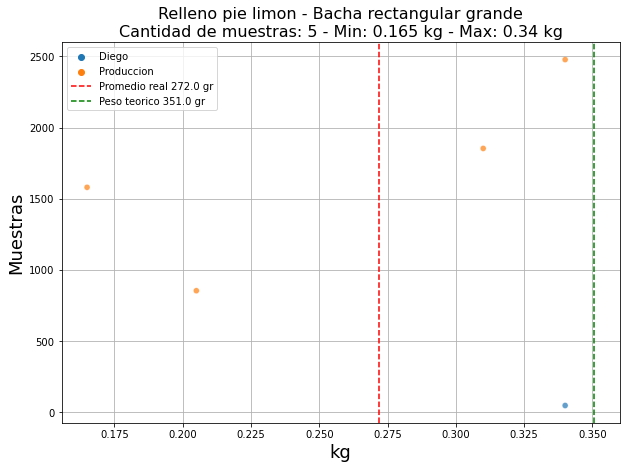

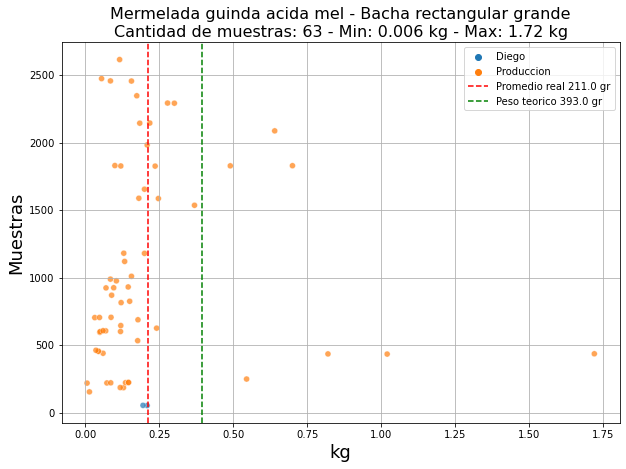

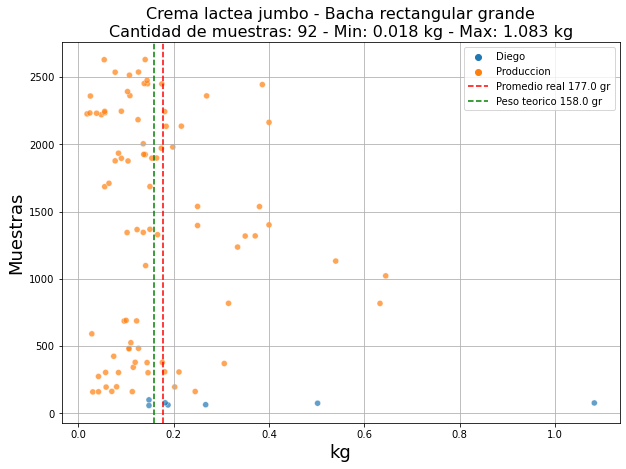

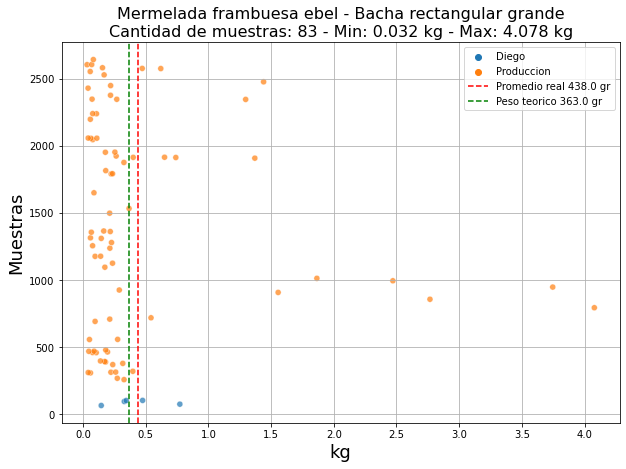

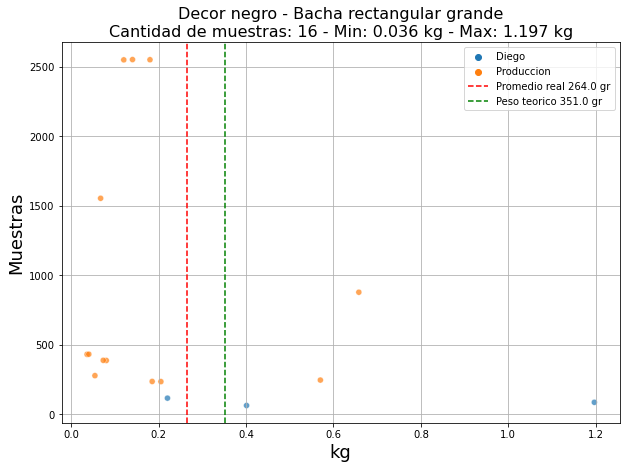

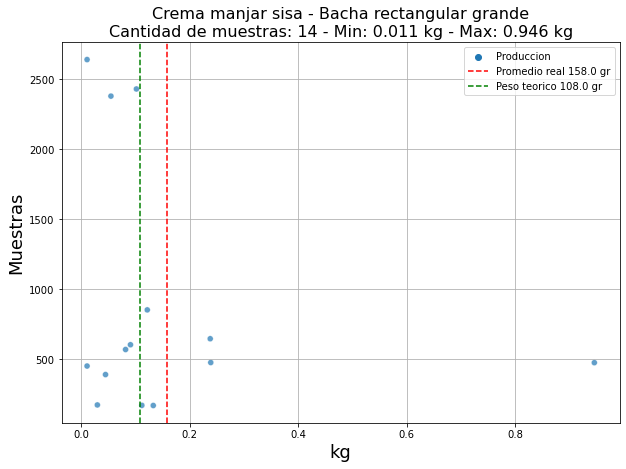

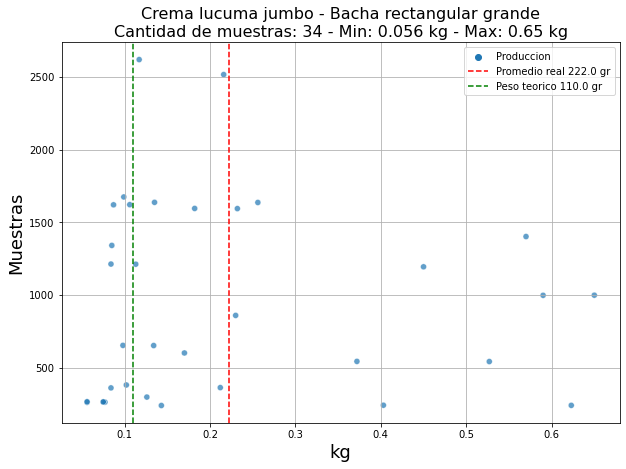

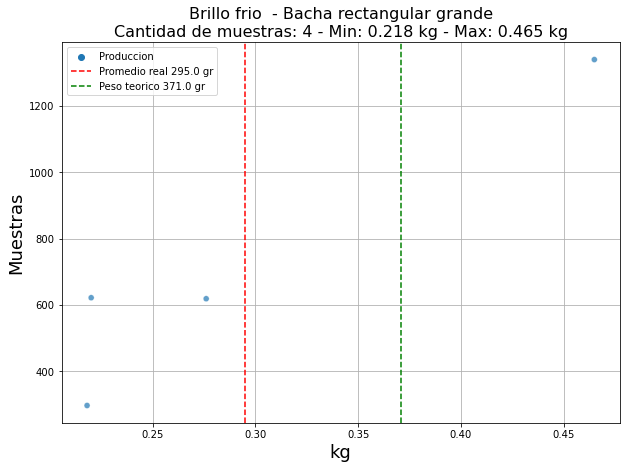

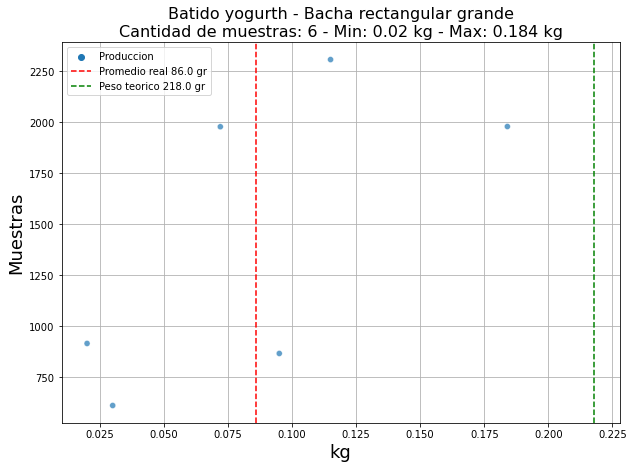

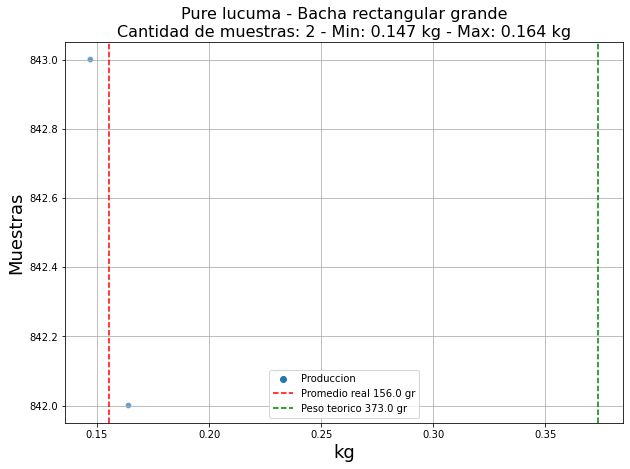

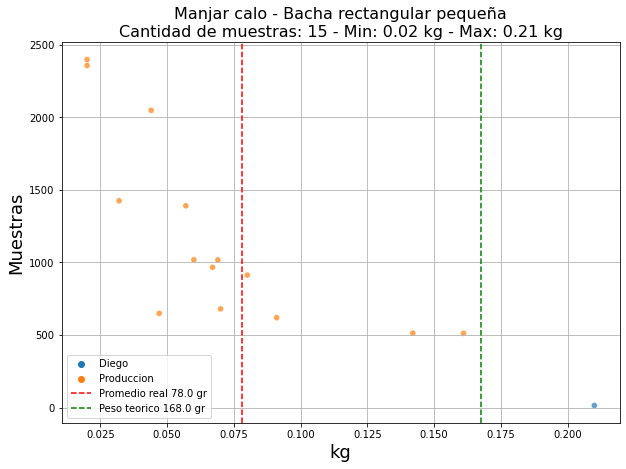

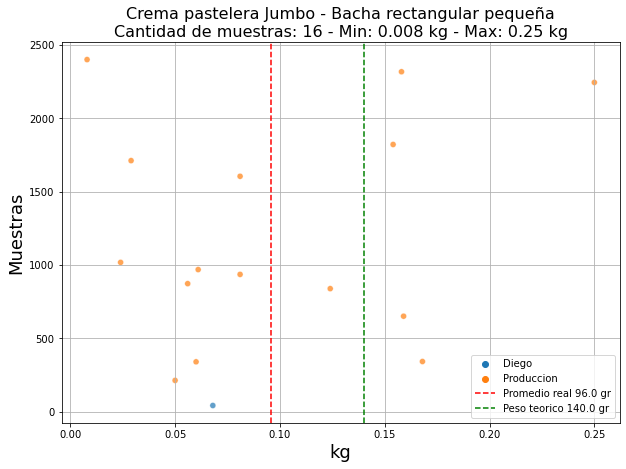

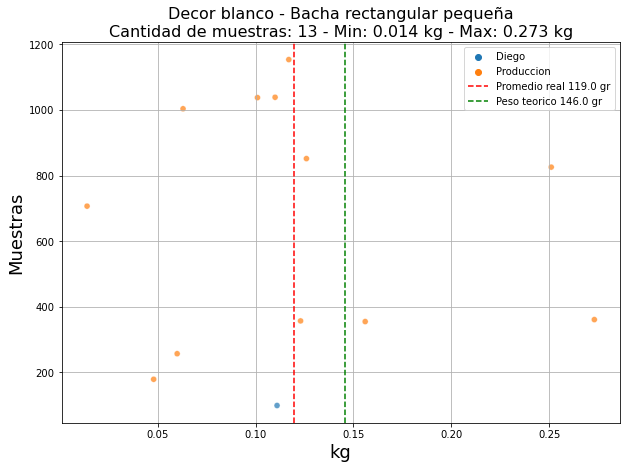

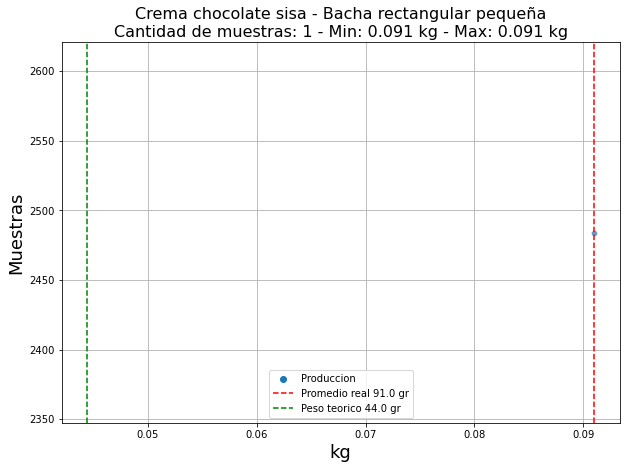

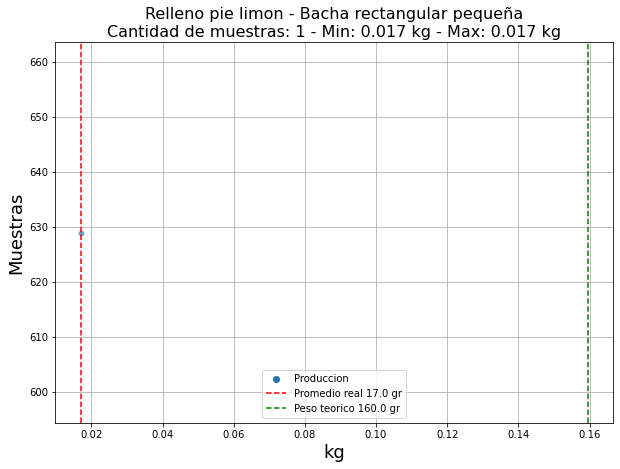

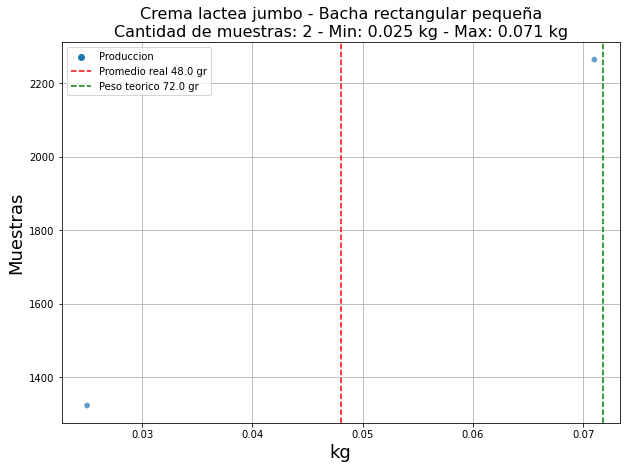

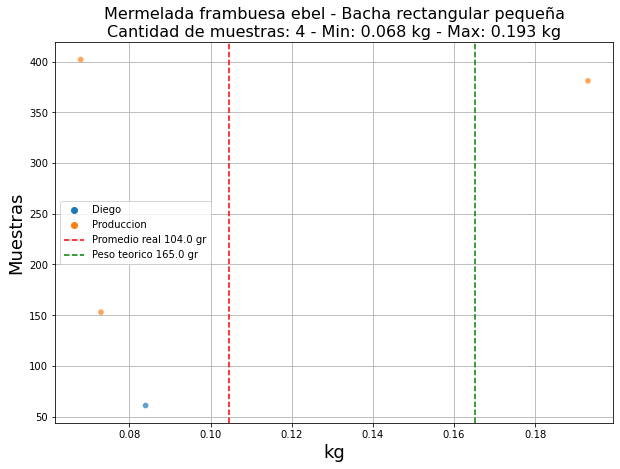

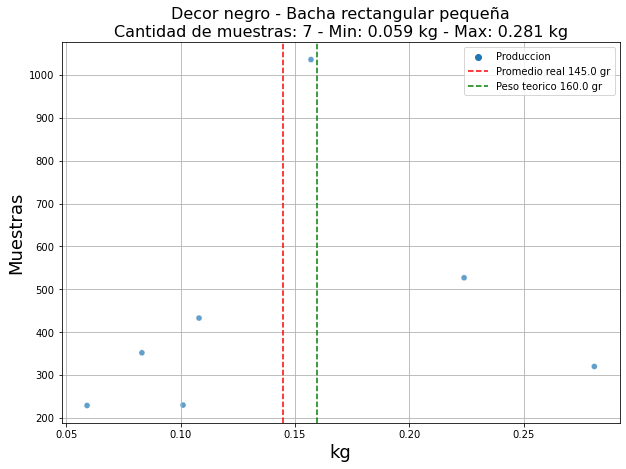

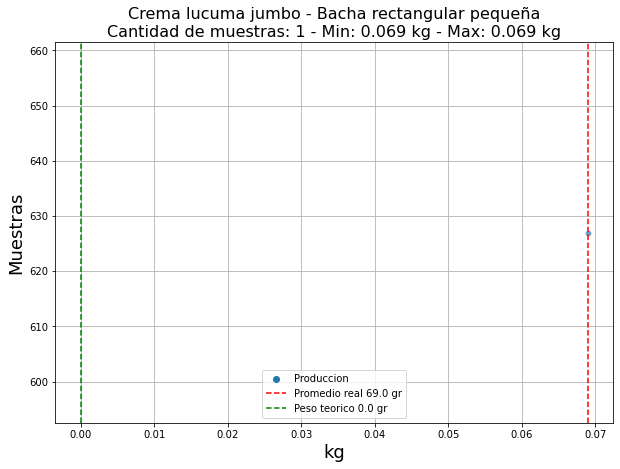

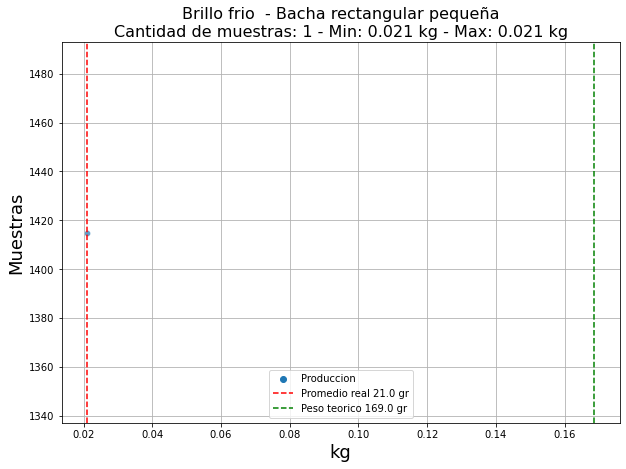

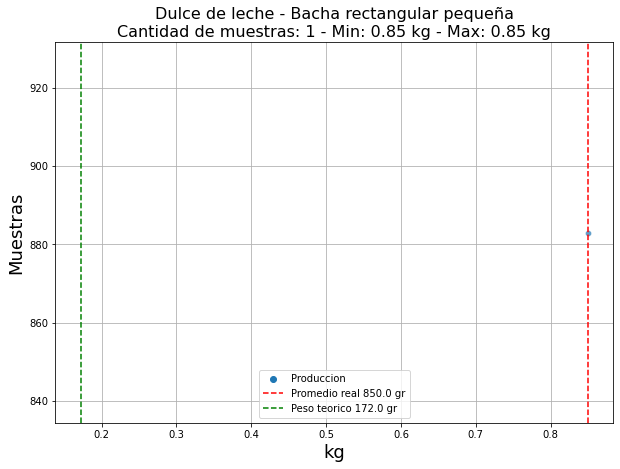

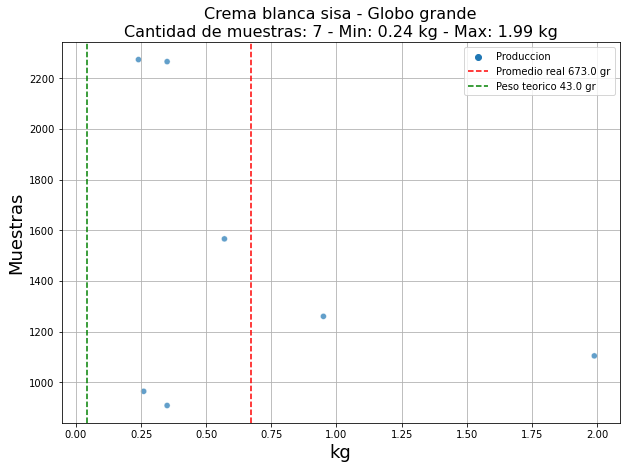

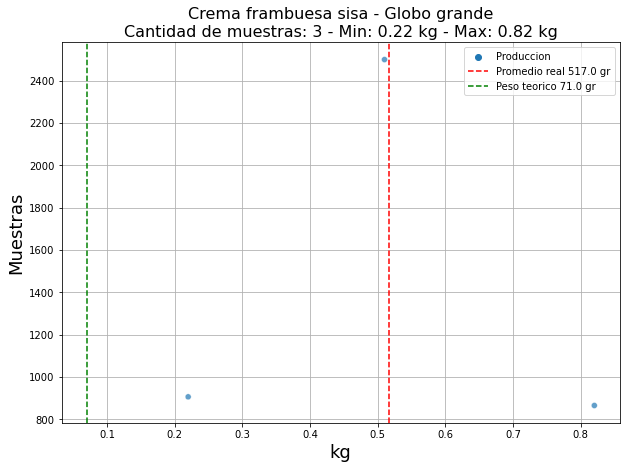

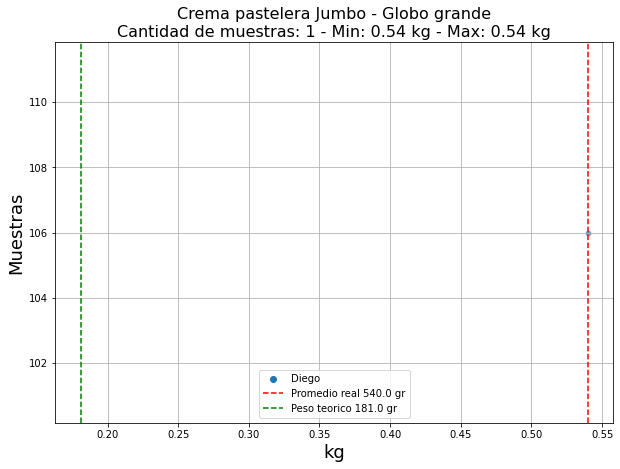

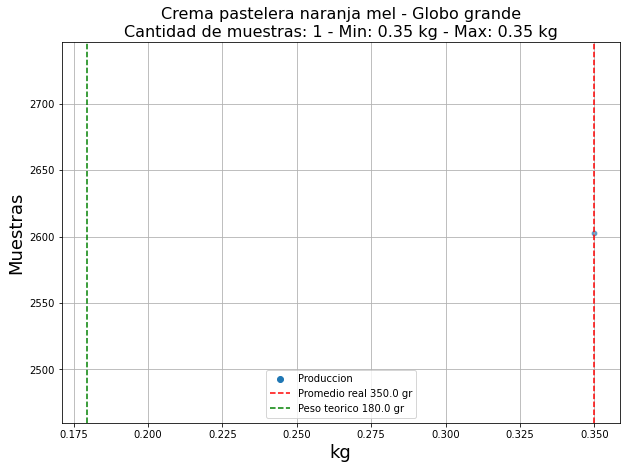

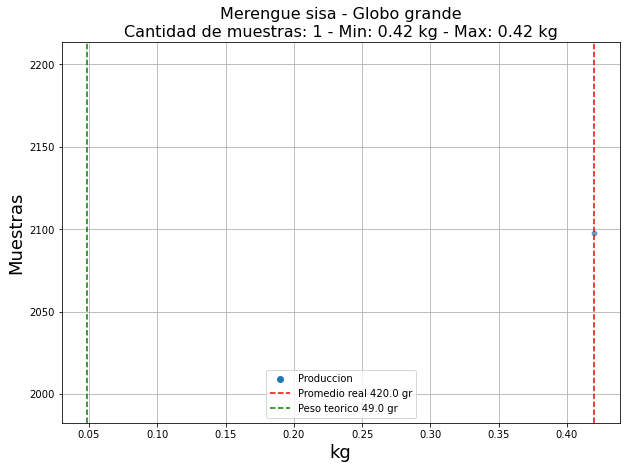

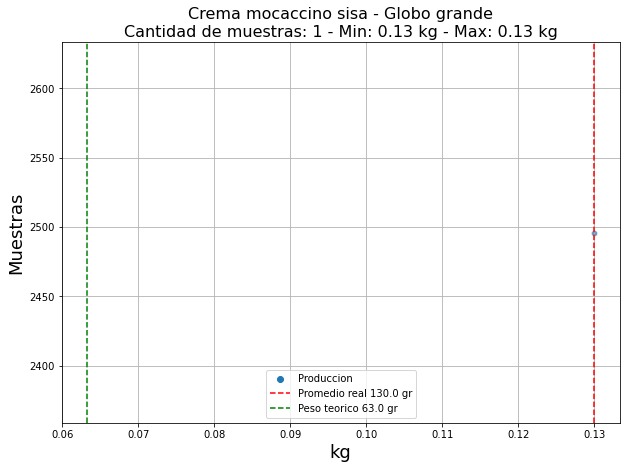

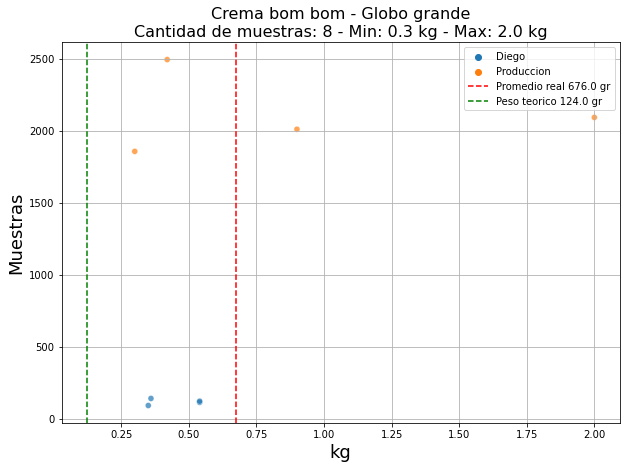

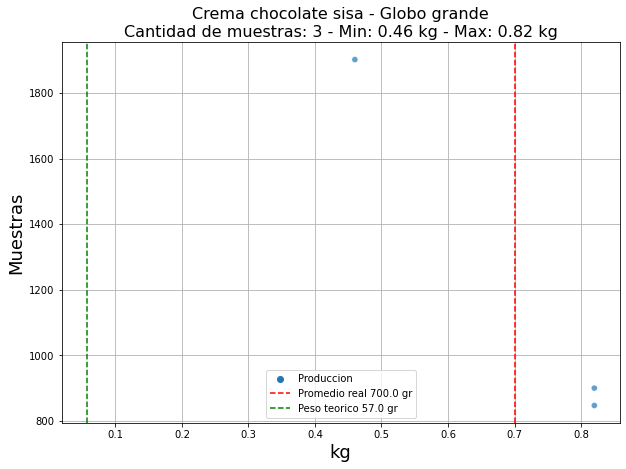

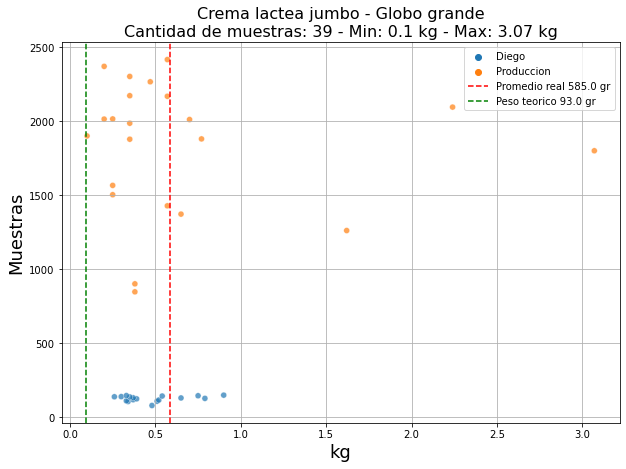

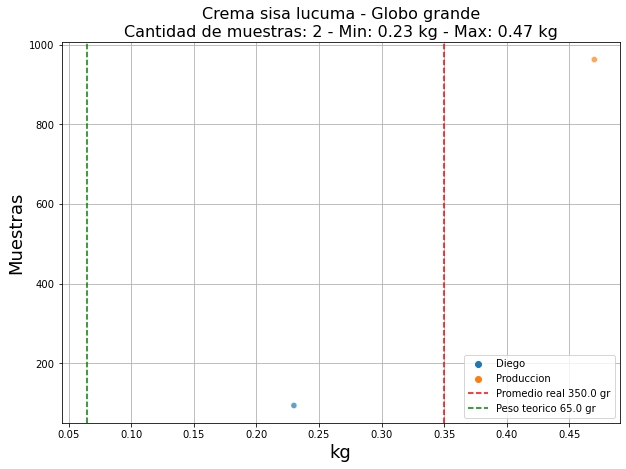

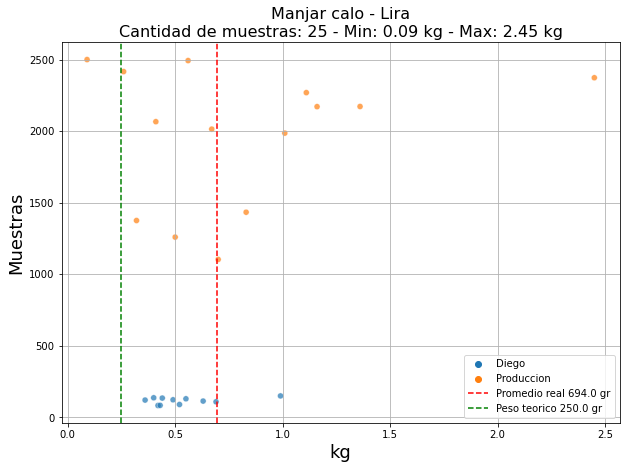

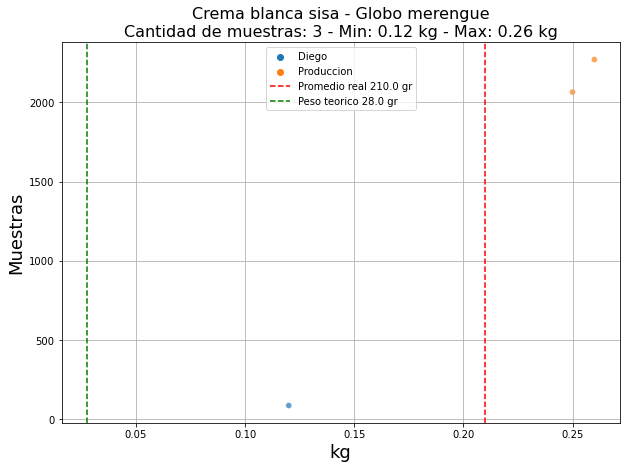

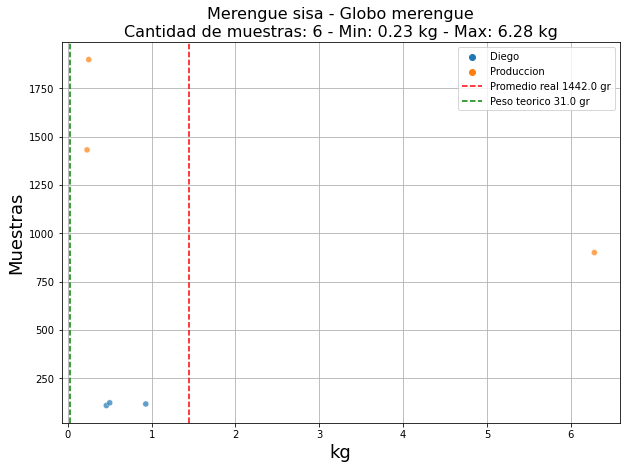

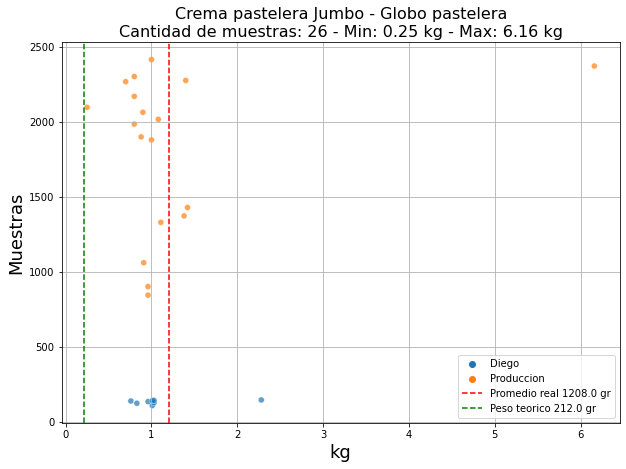

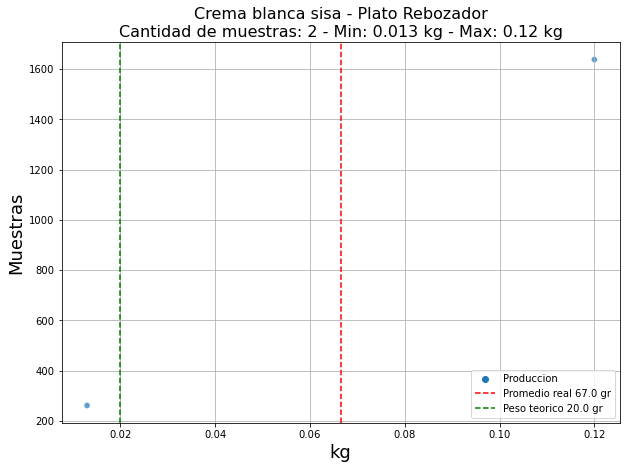

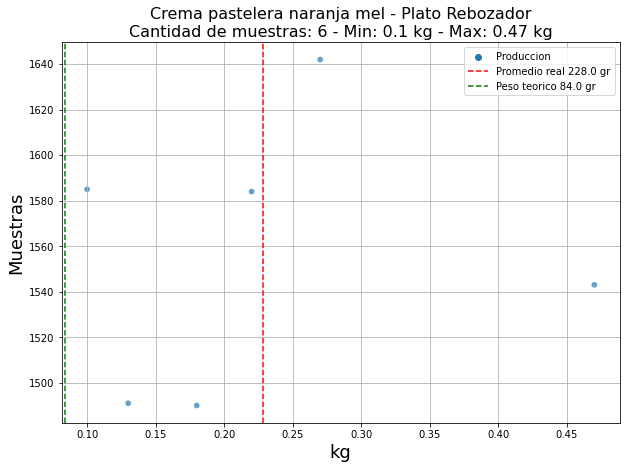

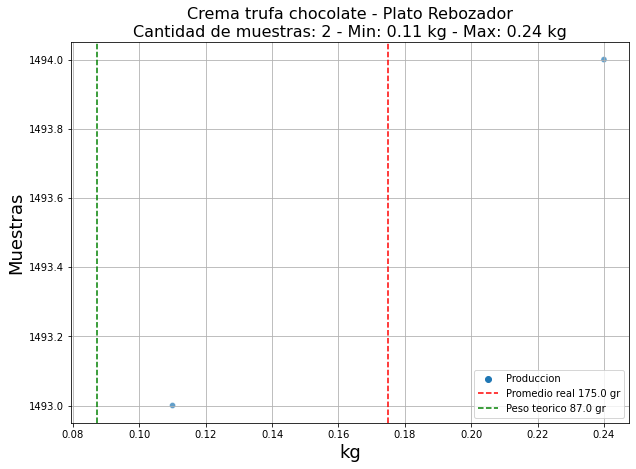

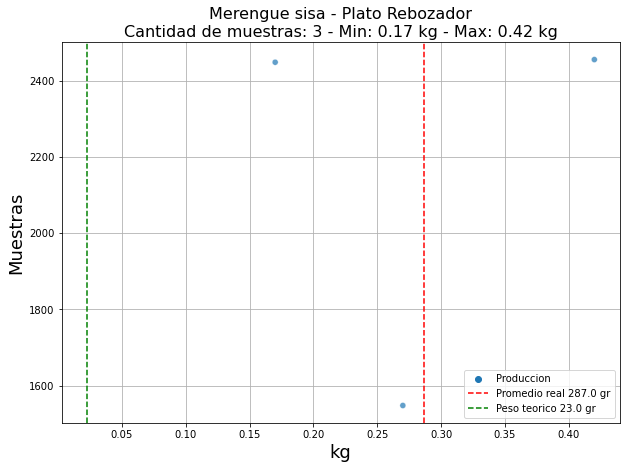

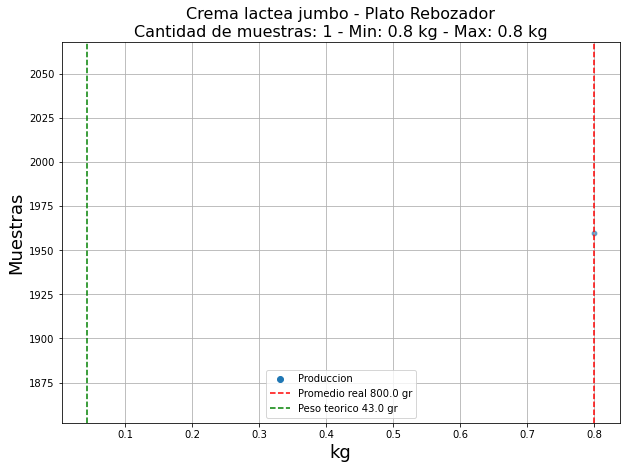

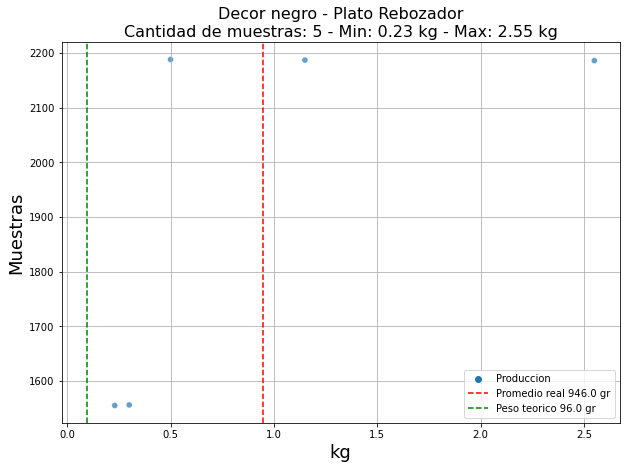

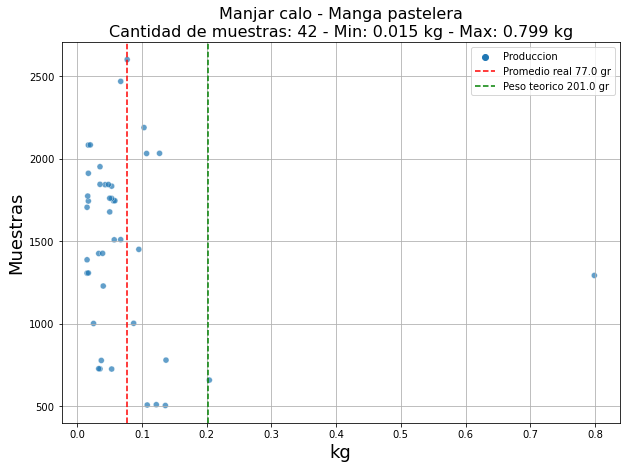

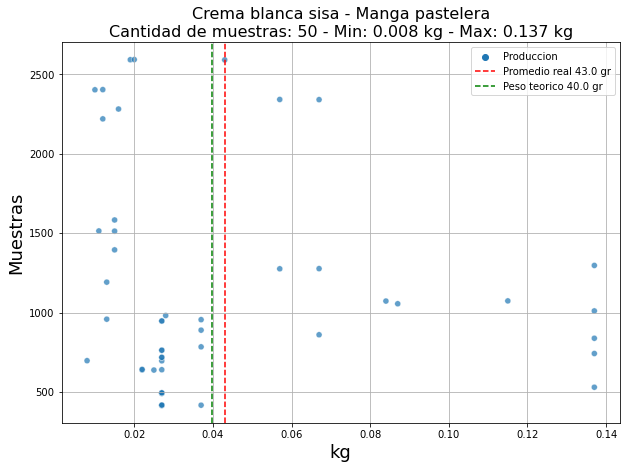

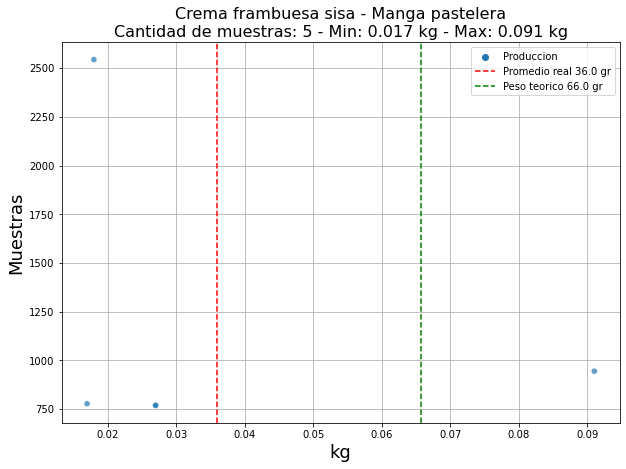

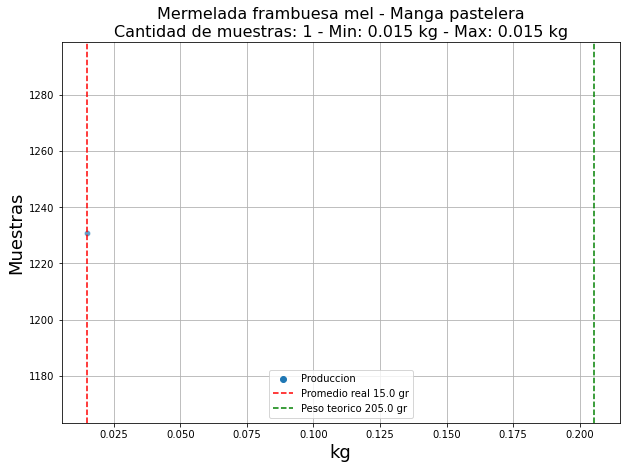

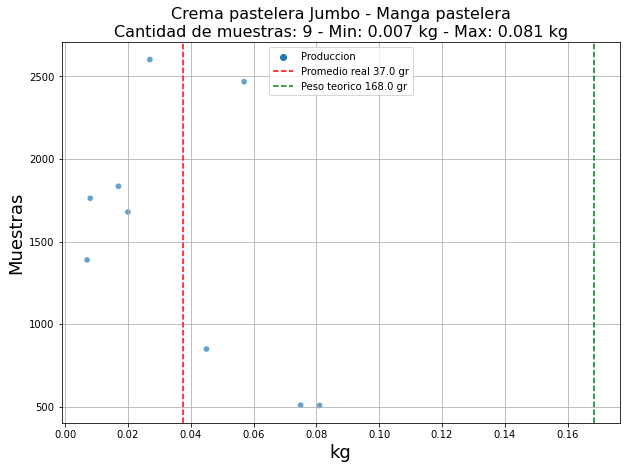

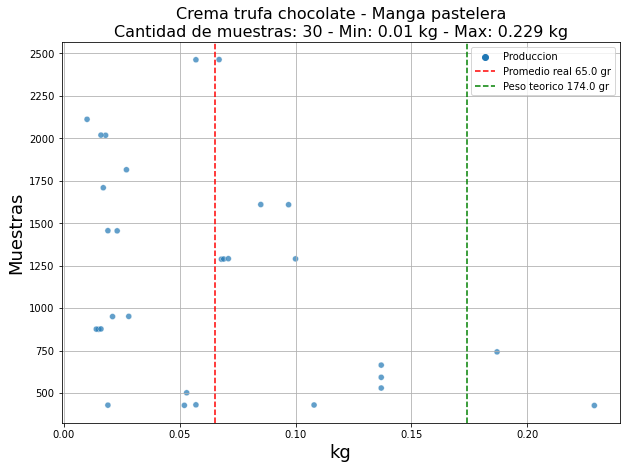

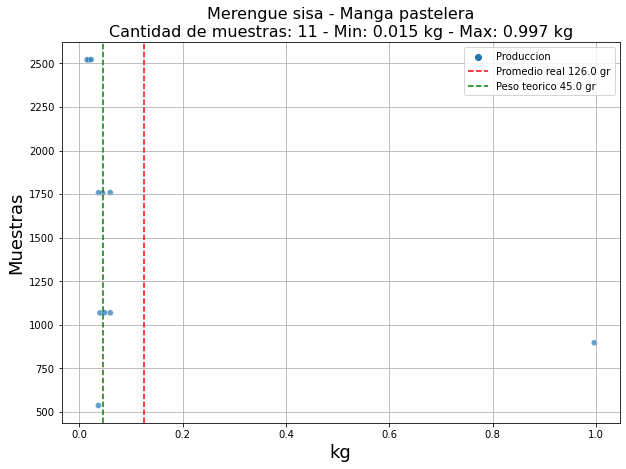

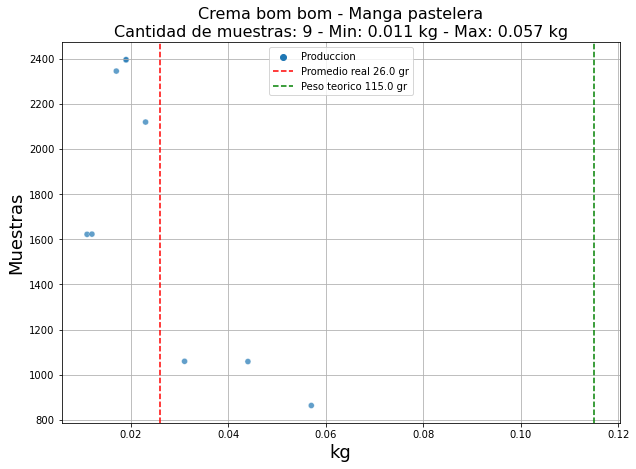

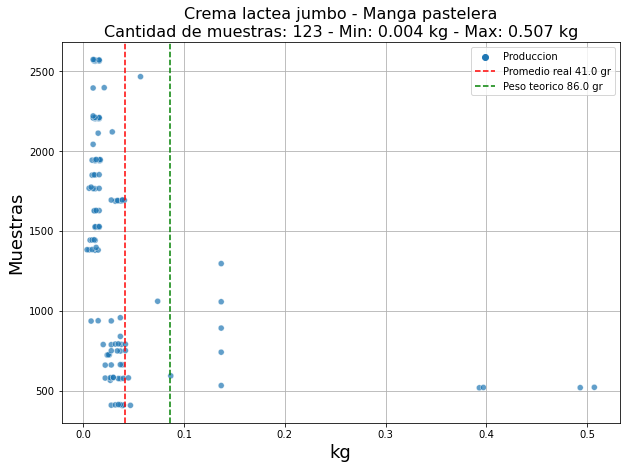

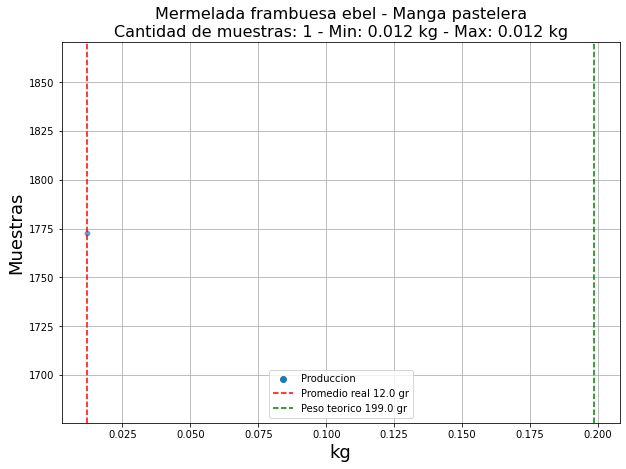

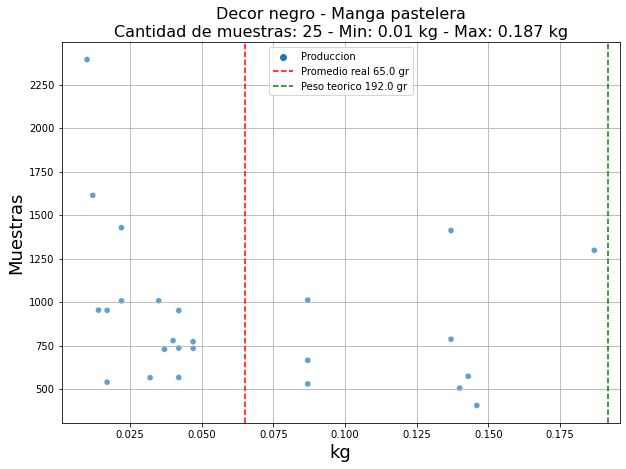

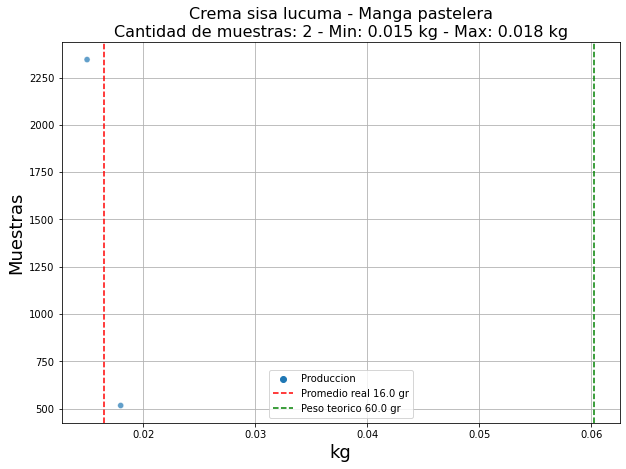

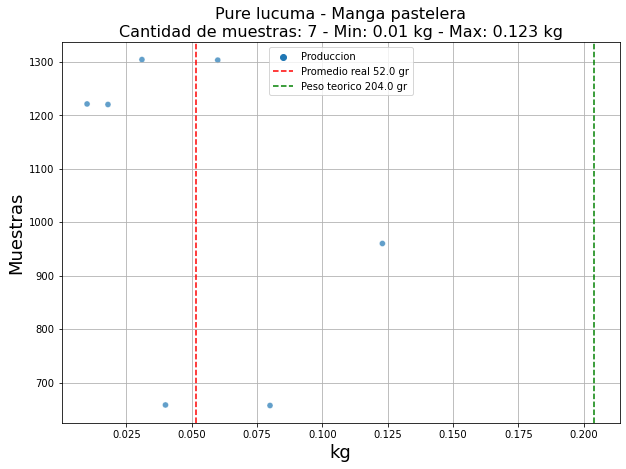

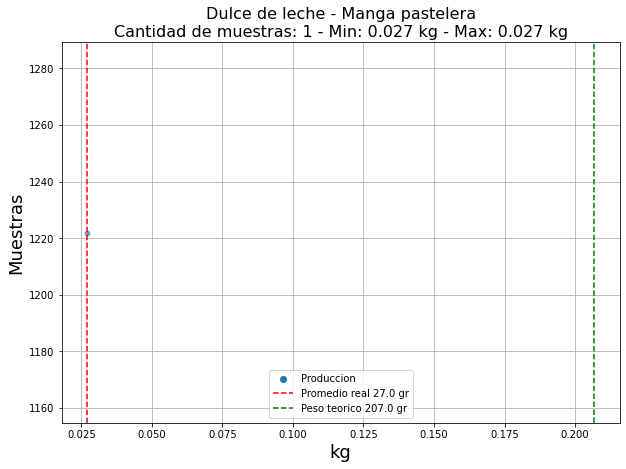

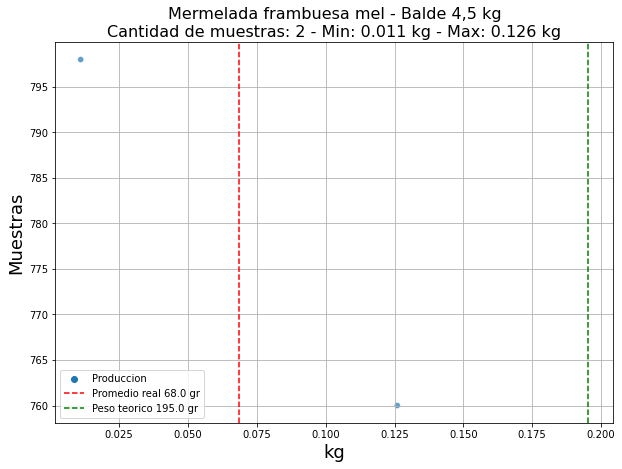

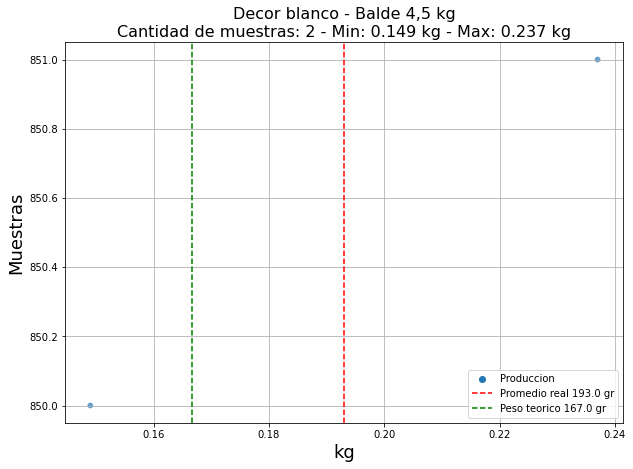

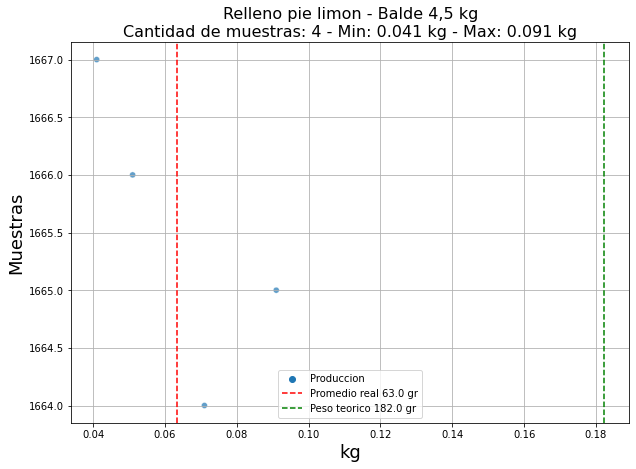

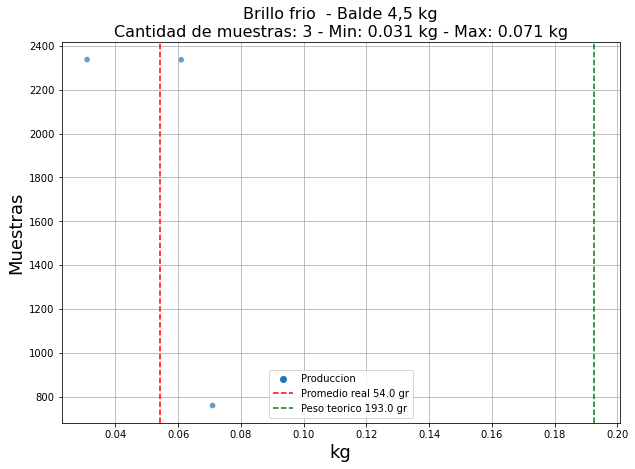

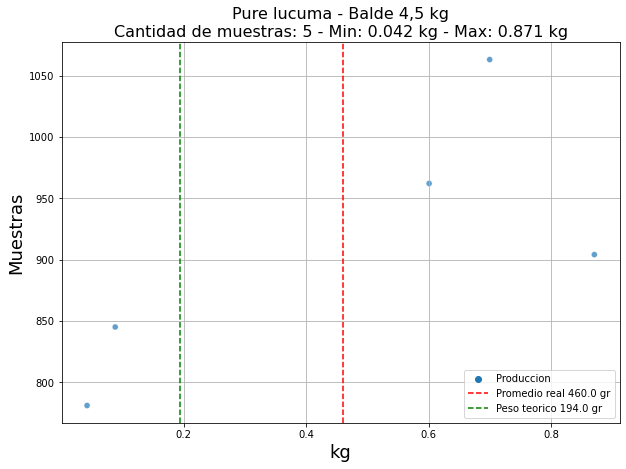

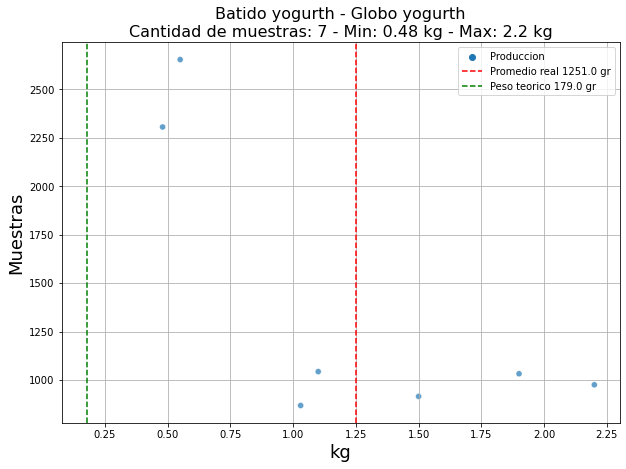

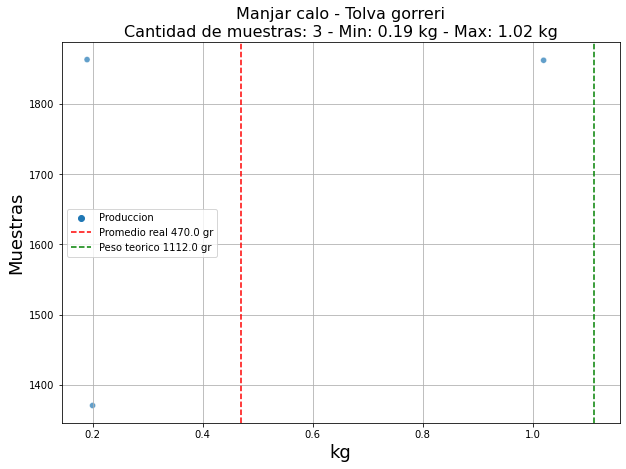

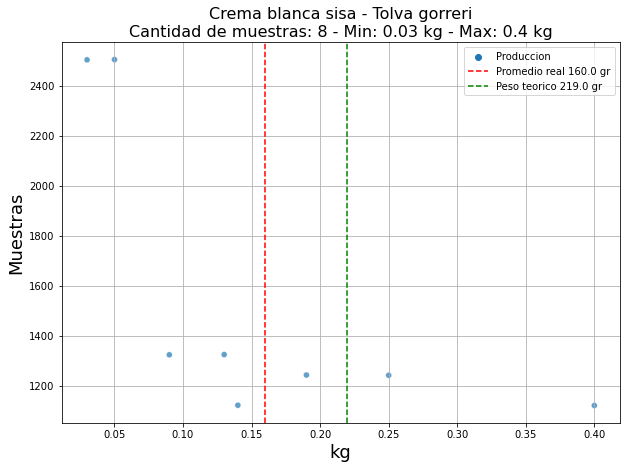

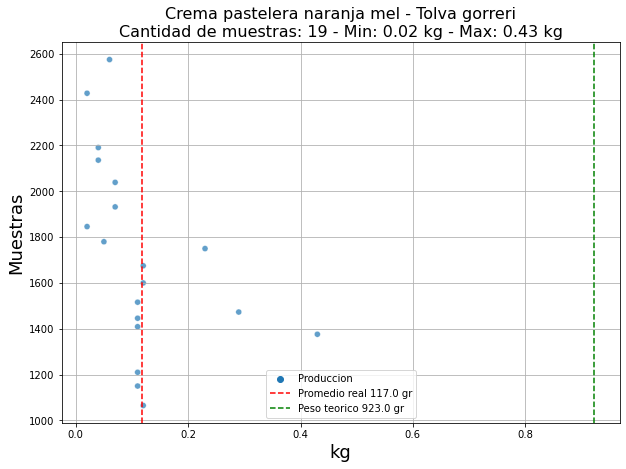

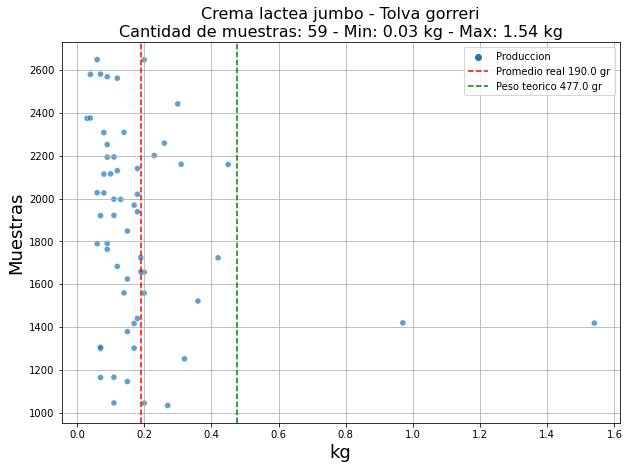

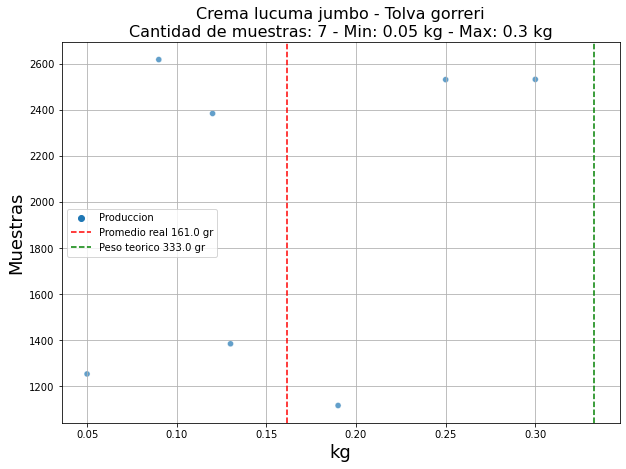

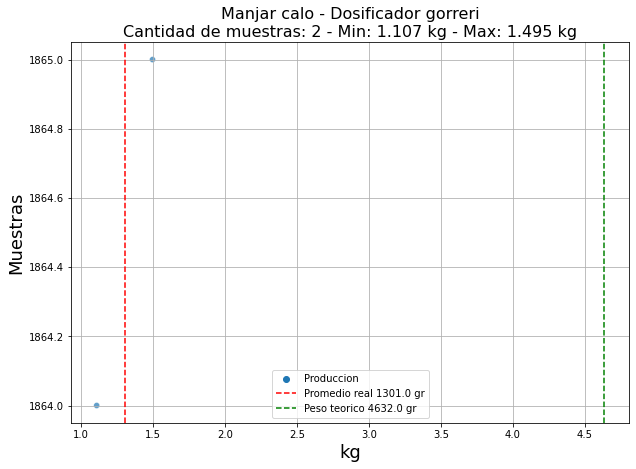

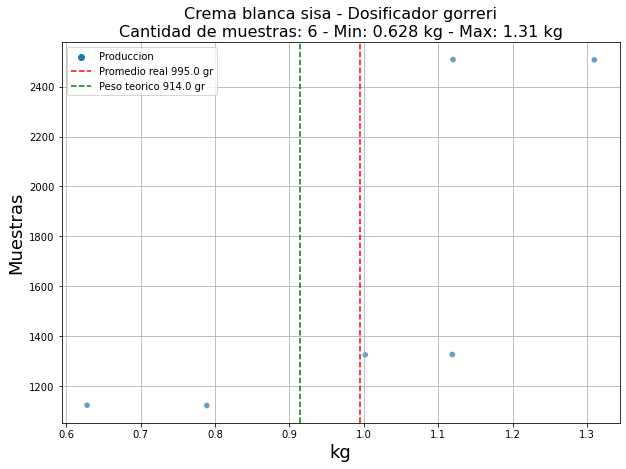

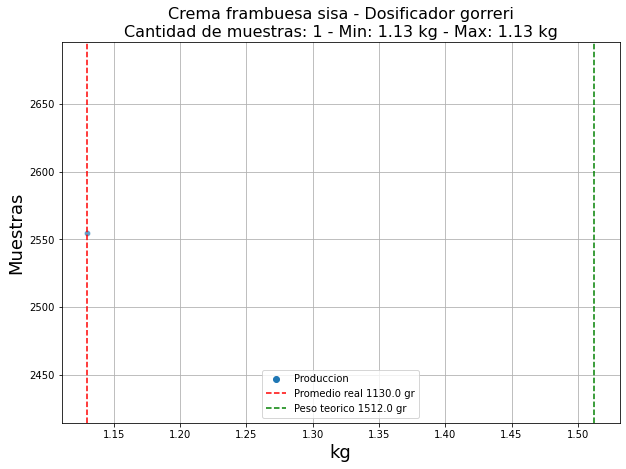

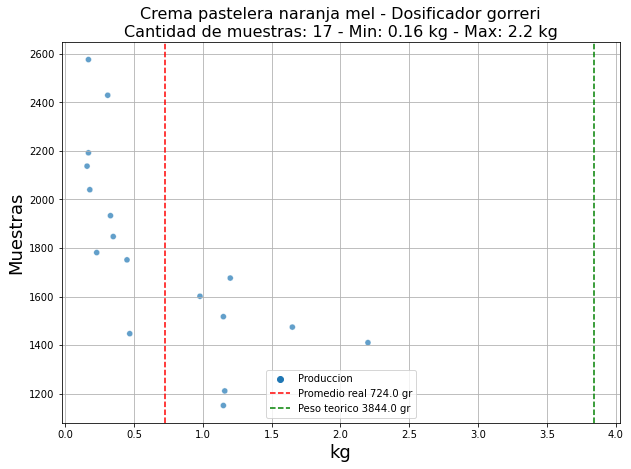

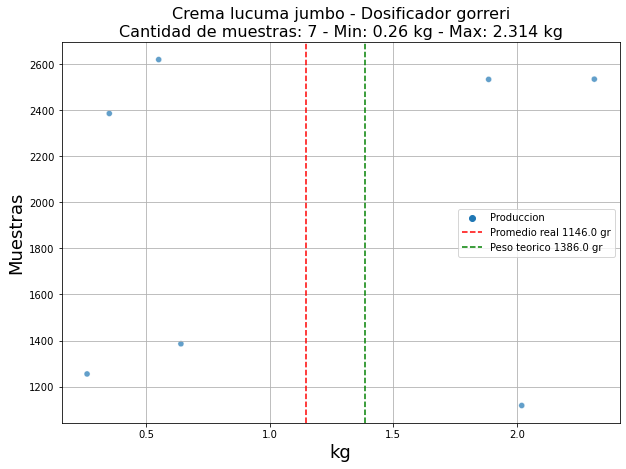

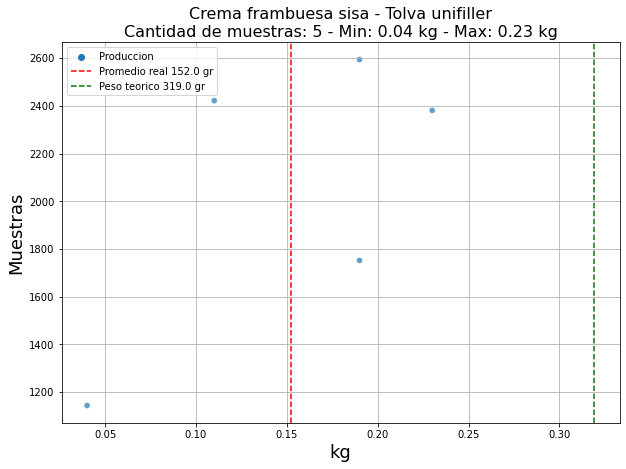

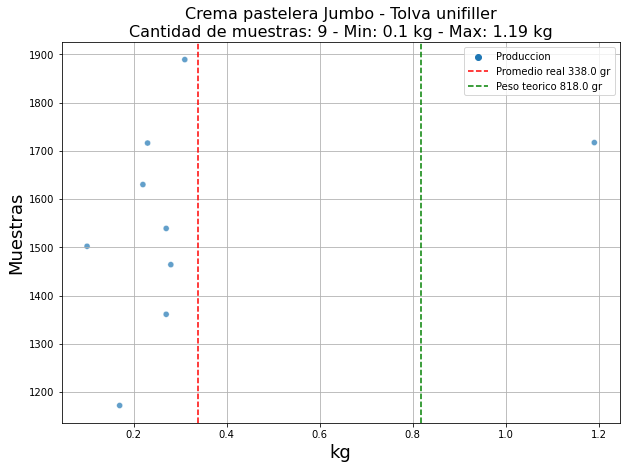

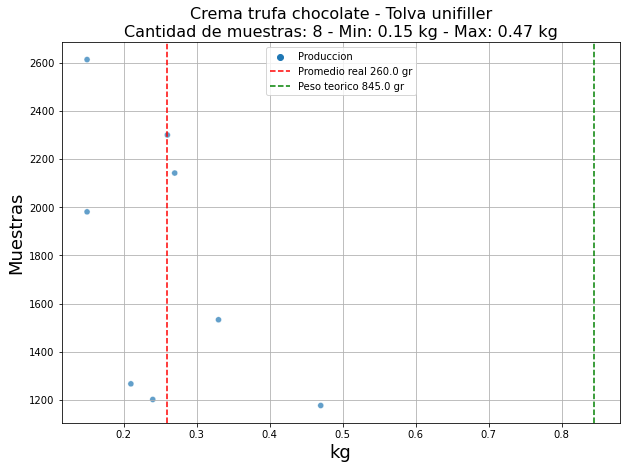

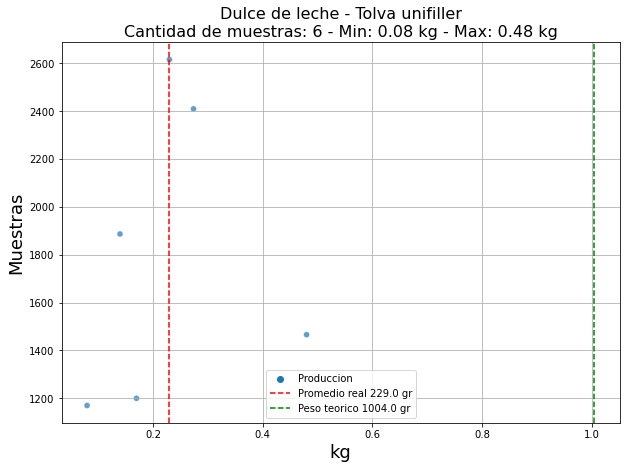

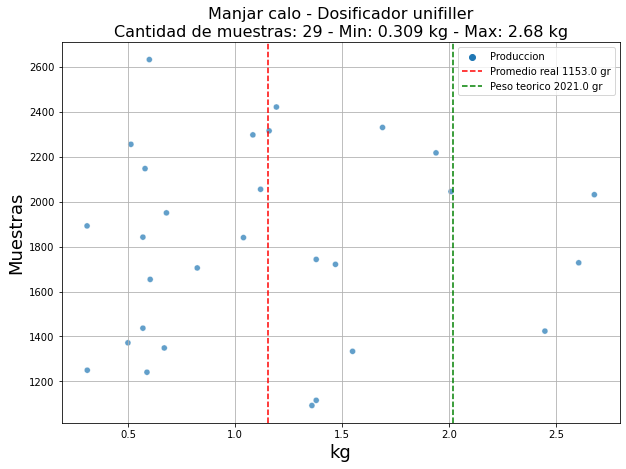

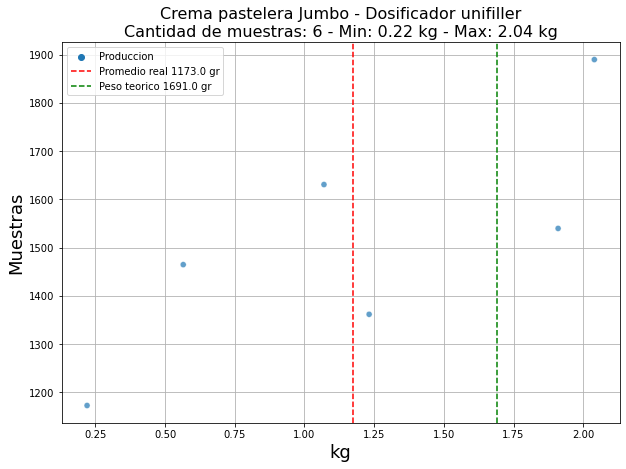

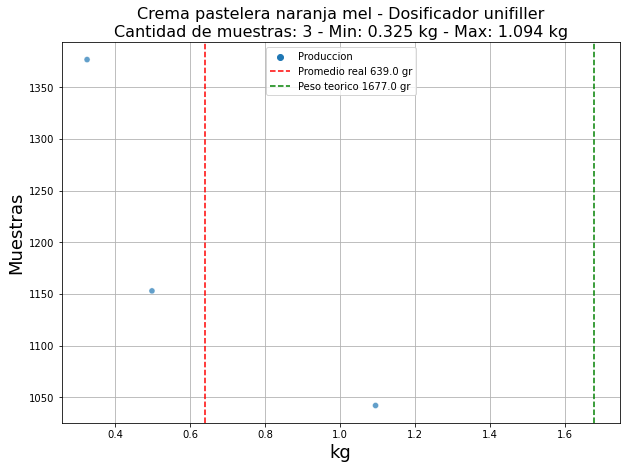

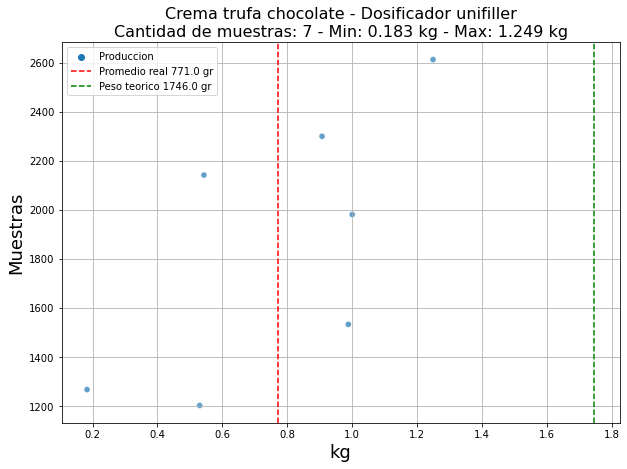

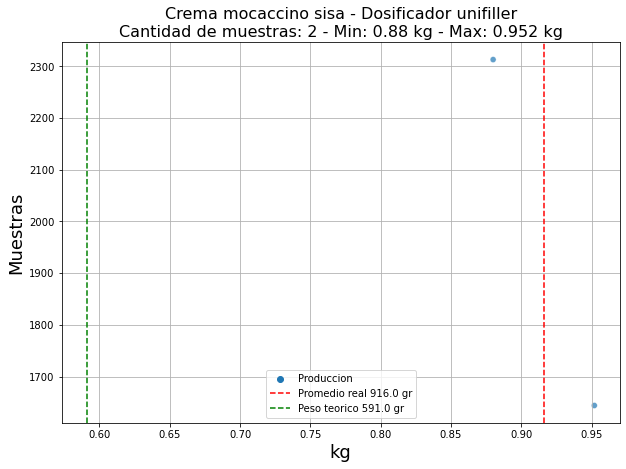

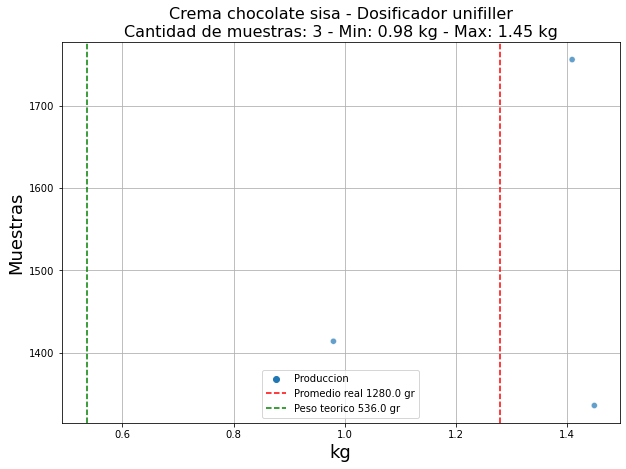

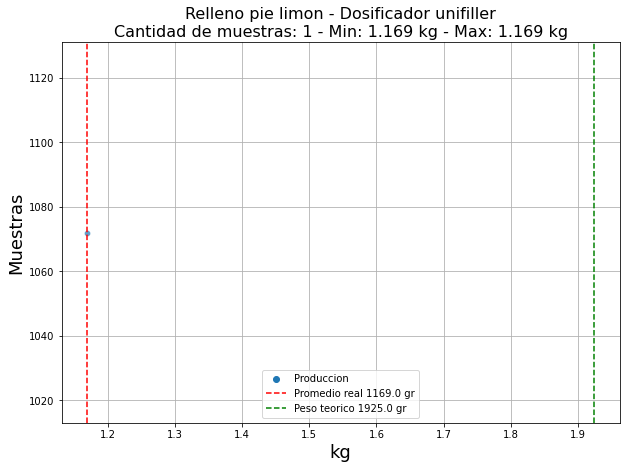

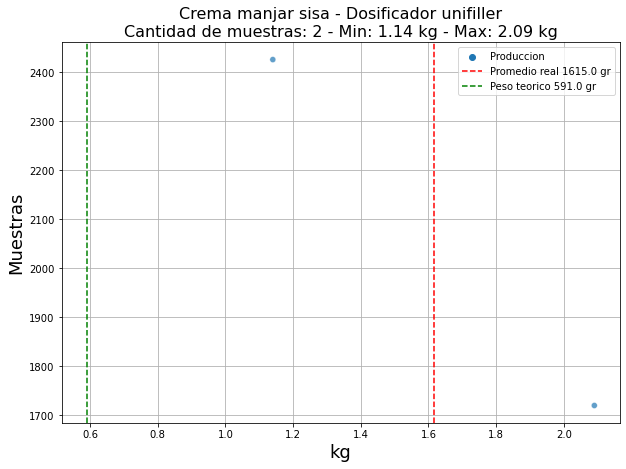

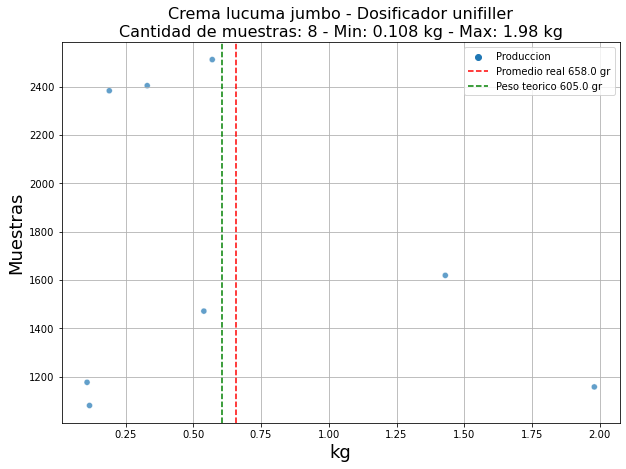

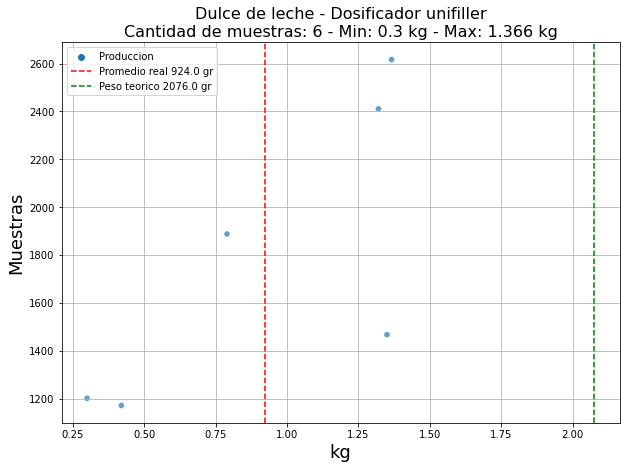

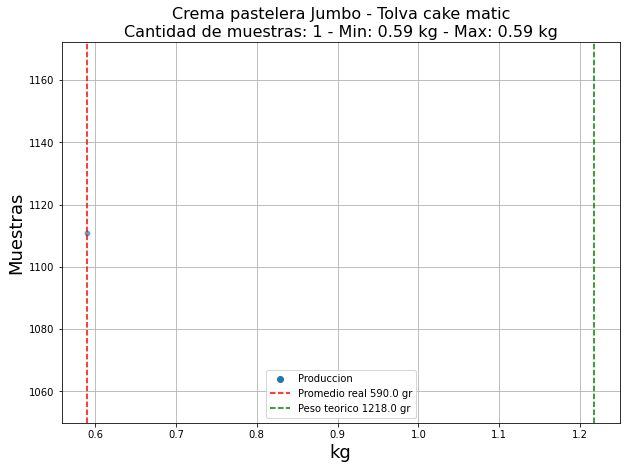

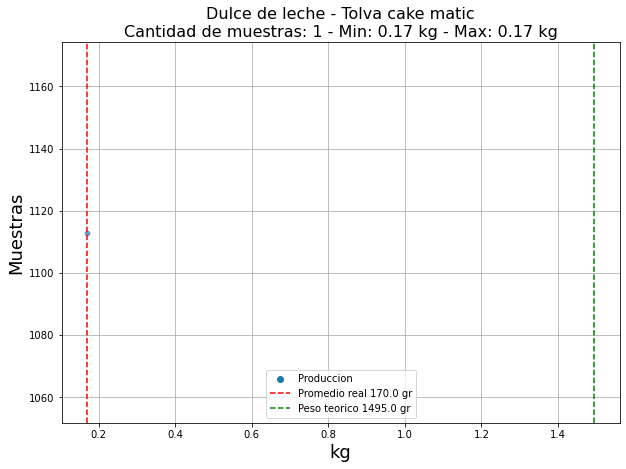

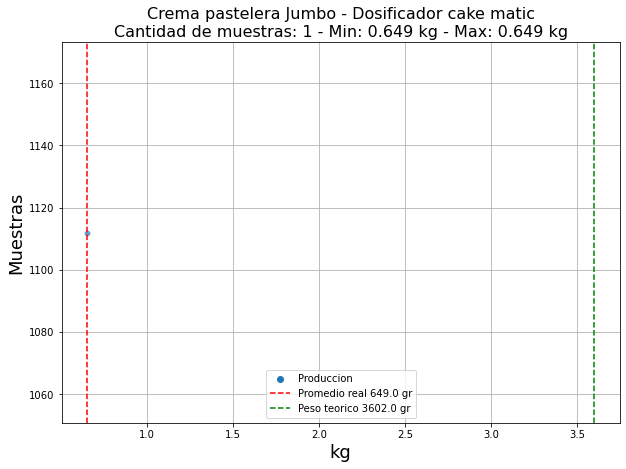

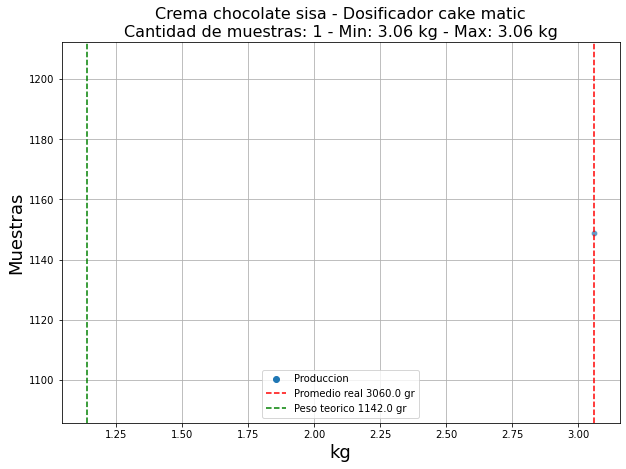

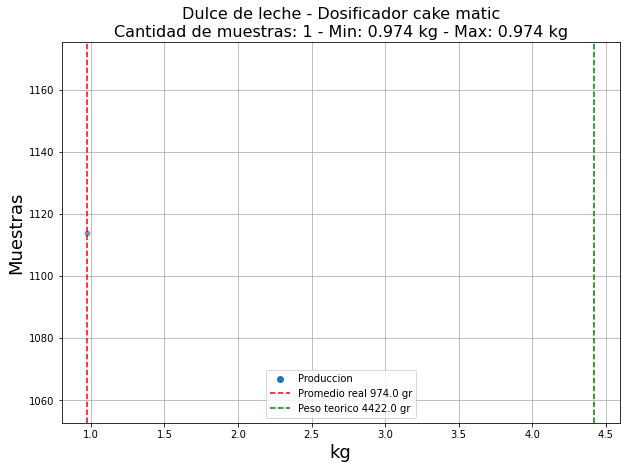

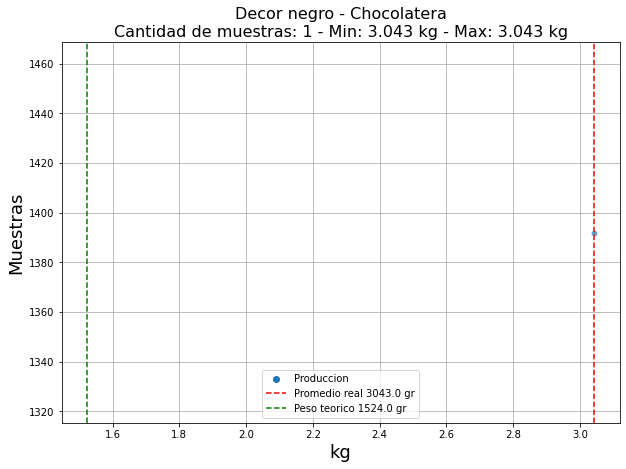

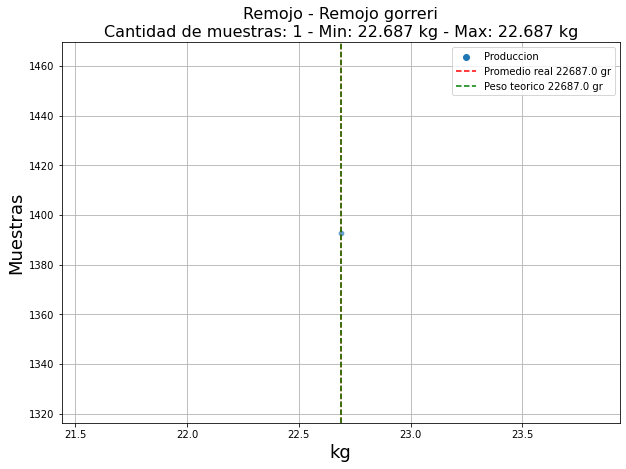

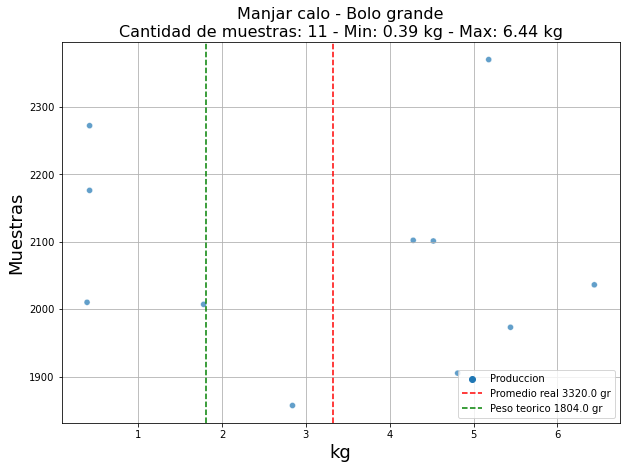

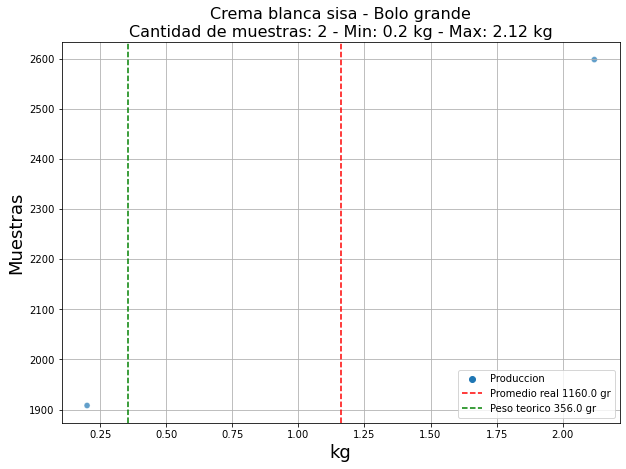

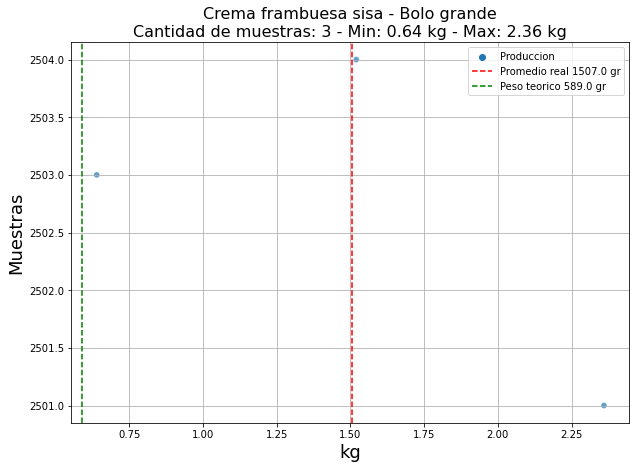

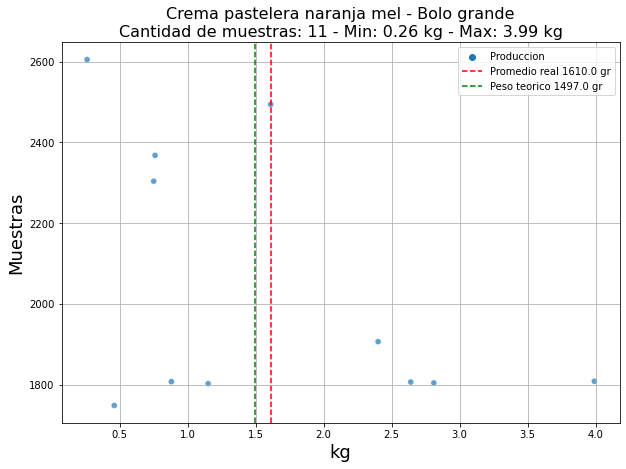

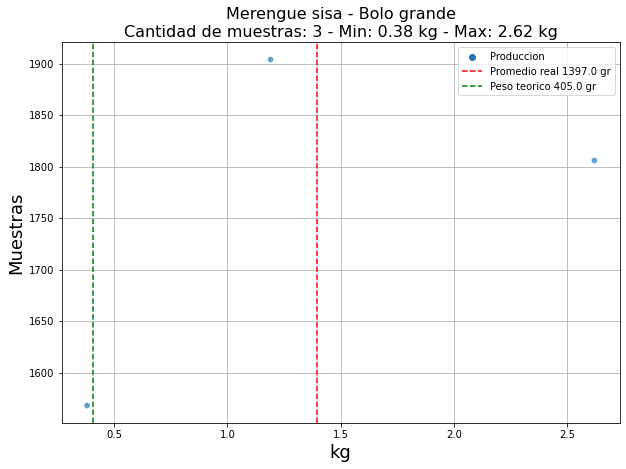

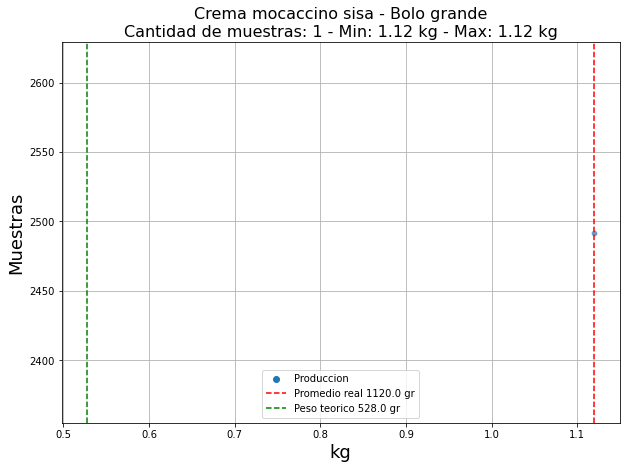

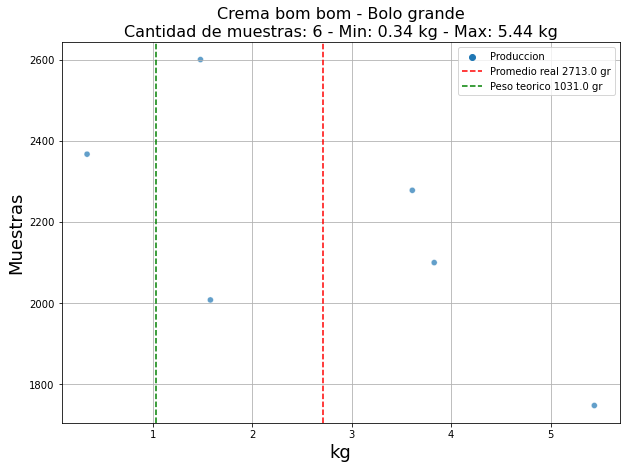

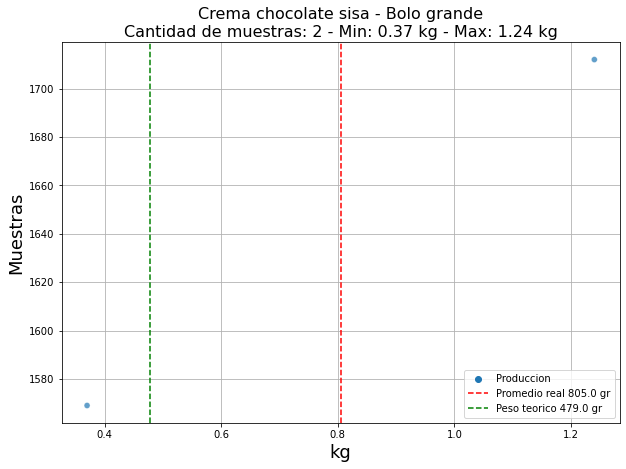

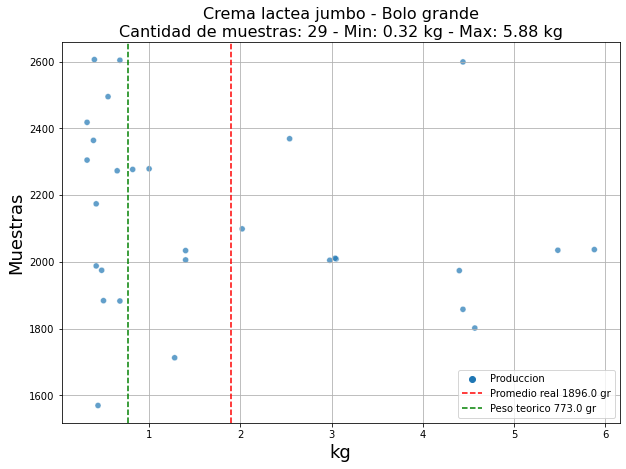

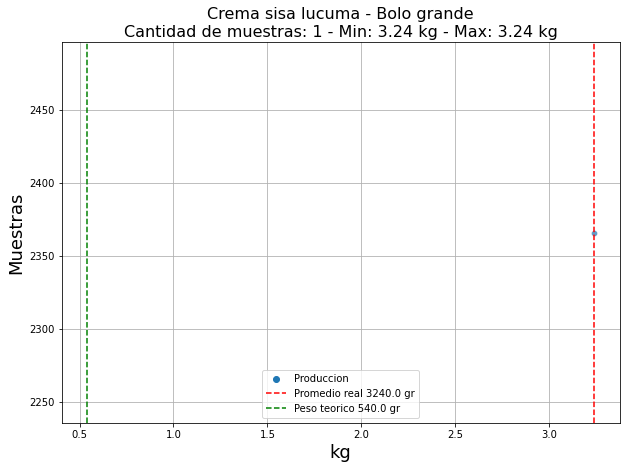

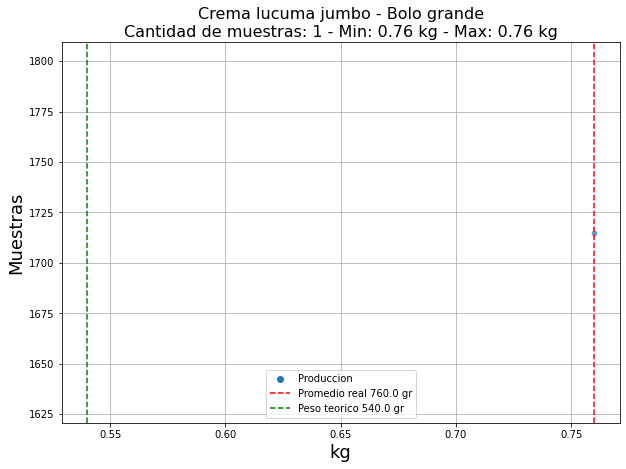

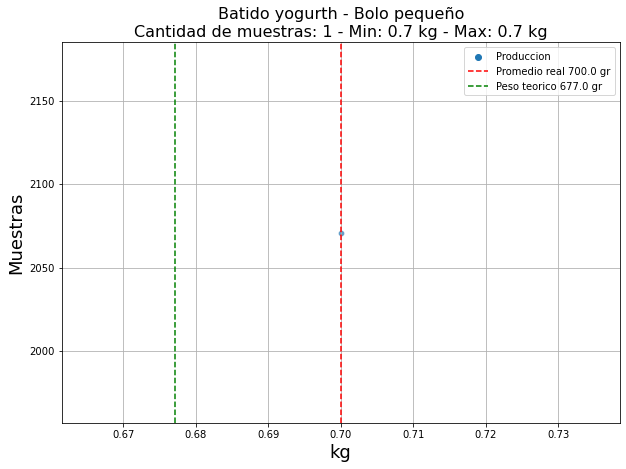

In [7]:
df['Llave'] = df['Nombre MP']+df['Utensilio']
llave = df['Llave'].drop_duplicates()
utensilio = df['Utensilio'].drop_duplicates()
materia_prima = df['Nombre MP'].drop_duplicates()
for ut in utensilio:
    for mp in materia_prima:
        llv = mp+ut
        for lv in llave:
            if lv == llv:
                Grafico(df,ut,mp).graficar()
                plt.savefig(ut+'-'+mp+'.jpg',format='jpg')

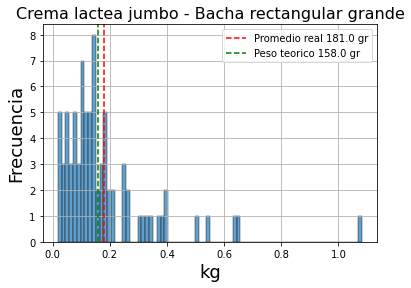

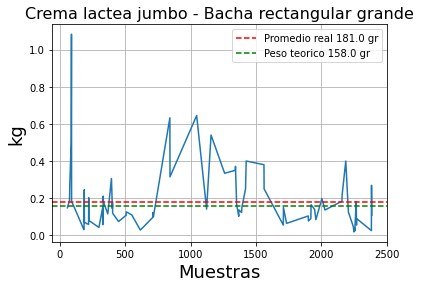

In [40]:
M1 = Grafico(df,'Bacha rectangular grande', 'Crema lactea jumbo').graficar()
N1 = Grafico_hist(df, 'Bacha rectangular grande', 'Crema lactea jumbo').graficar_hist()
L1 = Grafico_lineal(df, 'Bacha rectangular grande', 'Crema lactea jumbo').graficar_lin()

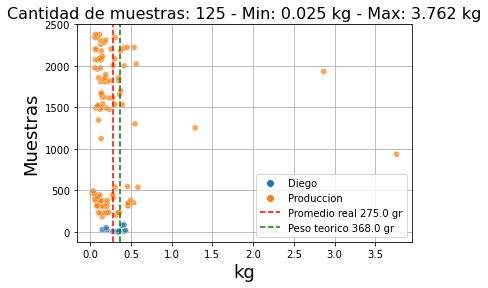

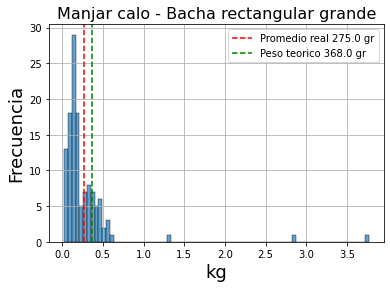

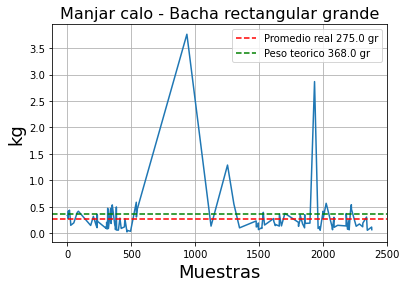

In [35]:
M2 = Grafico(df, 'Bacha rectangular grande', 'Manjar calo').graficar()
N2 = Grafico_hist(df, 'Bacha rectangular grande', 'Manjar calo').graficar_hist()
L2 = Grafico_lineal(df, 'Bacha rectangular grande', 'Manjar calo').graficar_lin()

Cantidad de muestras: 127 - Min: 0.011 kg - Max: 2.535 kg


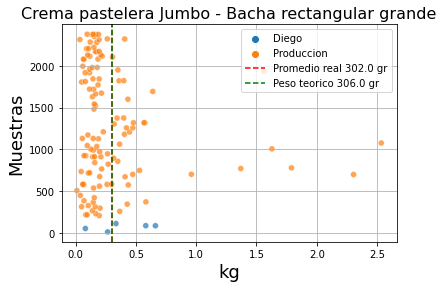

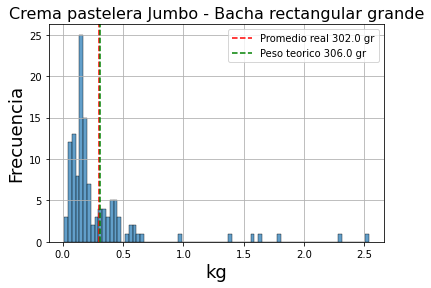

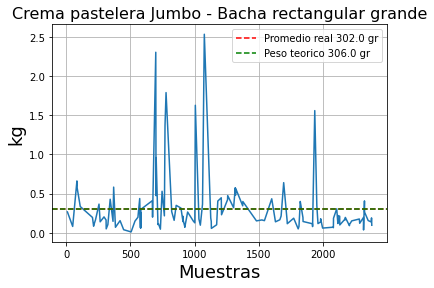

In [32]:
M3 = Grafico(df, 'Bacha rectangular grande', 'Crema pastelera Jumbo').graficar()
N3 = Grafico_hist(df, 'Bacha rectangular grande', 'Crema pastelera Jumbo').graficar_hist()
L3 = Grafico_lineal(df, 'Bacha rectangular grande', 'Crema pastelera Jumbo').graficar_lin()

Cantidad de muestras: 22 - Min: 0.32 kg - Max: 2.45 kg


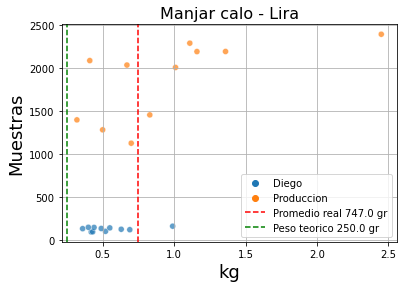

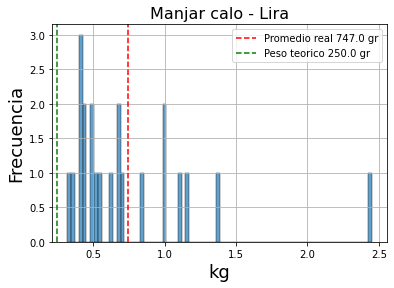

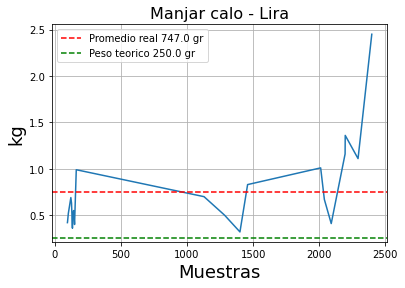

In [9]:
M4 = Grafico(df, 'Lira', 'Manjar calo').graficar()
N4 = Grafico_hist(df, 'Lira', 'Manjar calo').graficar_hist()
L4 = Grafico_lineal(df, 'Lira', 'Manjar calo').graficar_lin()

Cantidad de muestras: 38 - Min: 0.1 kg - Max: 3.07 kg


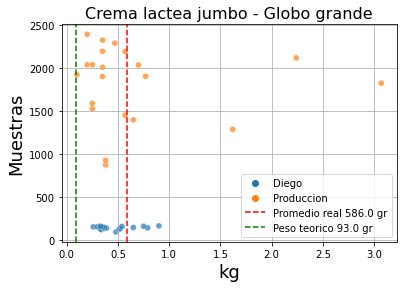

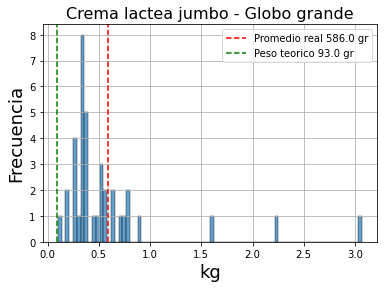

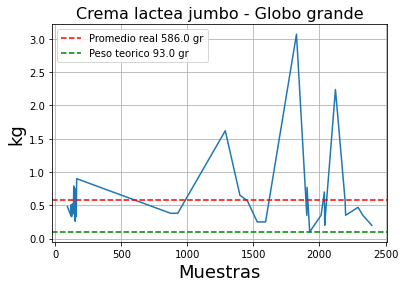

In [10]:
M5 = Grafico(df, 'Globo grande', 'Crema lactea jumbo').graficar()
N5 = Grafico_hist(df, 'Globo grande', 'Crema lactea jumbo').graficar_hist()
L5 = Grafico_lineal(df, 'Globo grande', 'Crema lactea jumbo').graficar_lin()

Cantidad de muestras: 59 - Min: 0.058 kg - Max: 4.375 kg


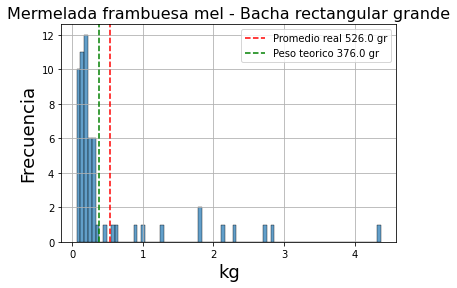

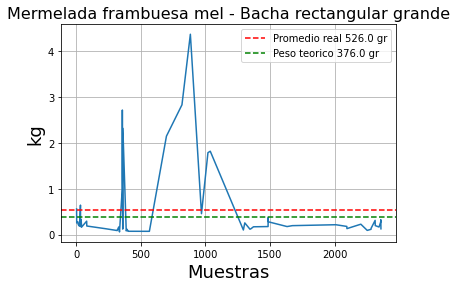

In [11]:
M6 = Grafico(df, 'Bacha rectangular grande', 'Mermelada frambuesa mel').graficar()
N6 = Grafico_hist(df, 'Bacha rectangular grande', 'Mermelada frambuesa mel').graficar_hist()
L6 = Grafico_lineal(df, 'Bacha rectangular grande', 'Mermelada frambuesa mel').graficar_lin()

Cantidad de muestras: 94 - Min: 0.011 kg - Max: 0.96 kg


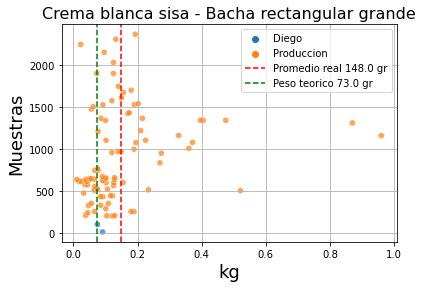

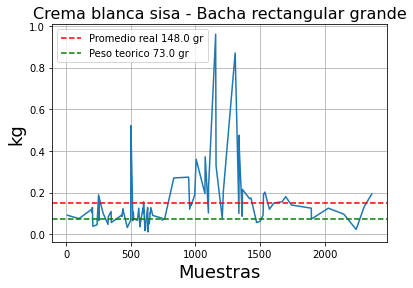

In [12]:
M7 = Grafico(df, 'Bacha rectangular grande', 'Crema blanca sisa').graficar()
N7 = Grafico_hist(df, 'Bacha rectangular grande', 'Crema blanca sisa').graficar_hist()
L7 = Grafico_lineal(df, 'Bacha rectangular grande', 'Crema blanca sisa').graficar_lin()

Cantidad de muestras: 6 - Min: 0.23 kg - Max: 6.28 kg


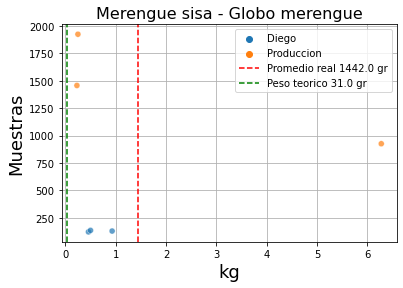

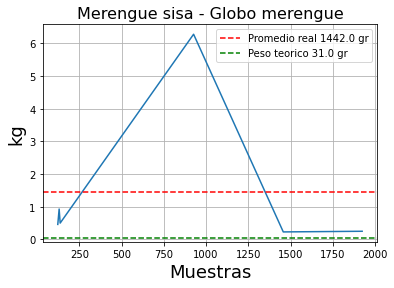

In [13]:
M8 = Grafico(df, 'Globo merengue', 'Merengue sisa').graficar()
N7 = Grafico_hist(df, 'Globo merengue', 'Merengue sisa').graficar_hist()
L7 = Grafico_lineal(df, 'Globo merengue', 'Merengue sisa').graficar_lin()

Cantidad de muestras: 25 - Min: 0.25 kg - Max: 6.16 kg


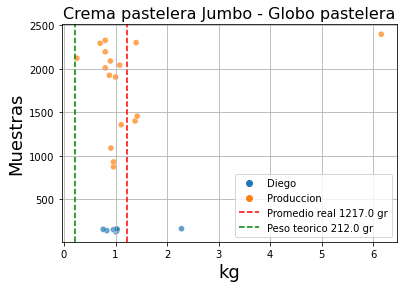

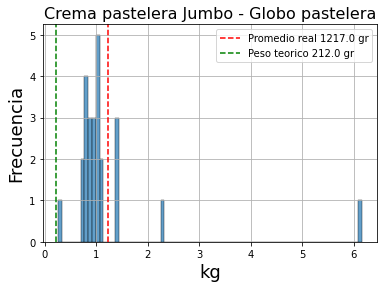

In [14]:
M9 = Grafico(df, 'Globo pastelera', 'Crema pastelera Jumbo').graficar()
N9 = Grafico_hist(df, 'Globo pastelera', 'Crema pastelera Jumbo').graficar_hist()
L9 = Grafico_lineal(df, 'Globo pastelera', 'Crema pastelera Jumbo').graficar_lin()

Cantidad de muestras: 32 - Min: 0.056 kg - Max: 0.65 kg


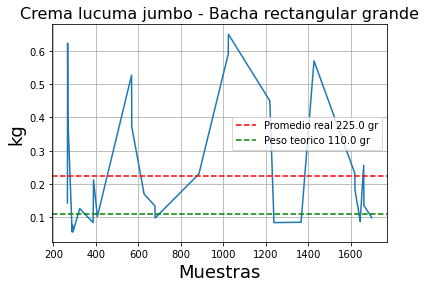

In [15]:
M10 = Grafico(df, 'Bacha rectangular grande', 'Crema lucuma jumbo').graficar()
N10 = Grafico_hist(df, 'Bacha rectangular grande', 'Crema lucuma jumbo').graficar_hist()
L10 = Grafico_lineal(df, 'Bacha rectangular grande', 'Crema lucuma jumbo').graficar_lin()

Cantidad de muestras: 14 - Min: 0.036 kg - Max: 1.197 kg


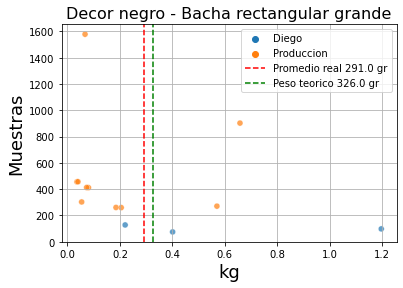

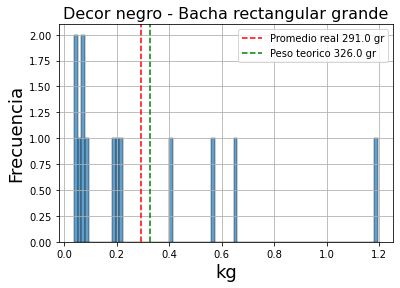

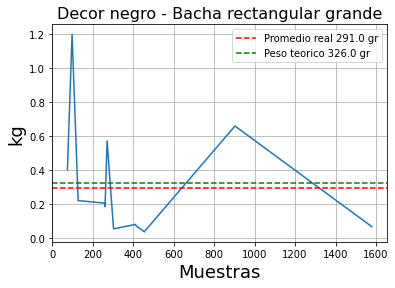

In [16]:
M11 = Grafico(df, 'Bacha rectangular grande', 'Decor negro').graficar()
N11 = Grafico_hist(df, 'Bacha rectangular grande', 'Decor negro').graficar_hist()
L11 = Grafico_lineal(df, 'Bacha rectangular grande', 'Decor negro').graficar_lin()

Cantidad de muestras: 223 - Min: 0.038 kg - Max: 2.258 kg


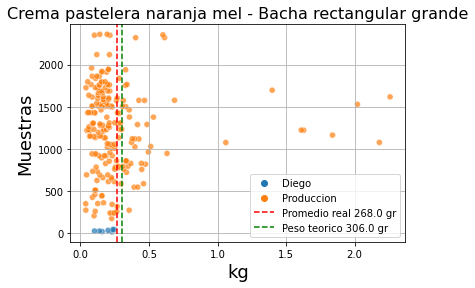

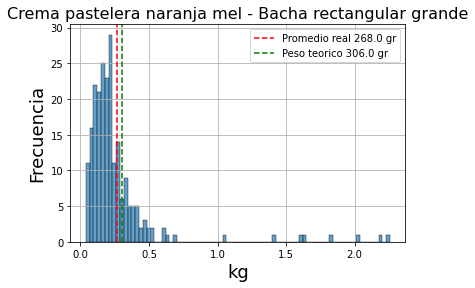

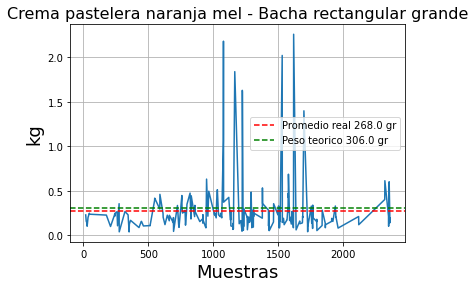

In [17]:
M12 = Grafico(df, 'Bacha rectangular grande', 'Crema pastelera naranja mel').graficar()
N12 = Grafico_hist(df, 'Bacha rectangular grande', 'Crema pastelera naranja mel').graficar_hist()
L12 = Grafico_lineal(df, 'Bacha rectangular grande', 'Crema pastelera naranja mel').graficar_lin()

Cantidad de muestras: 102 - Min: 0.021 kg - Max: 2.33 kg


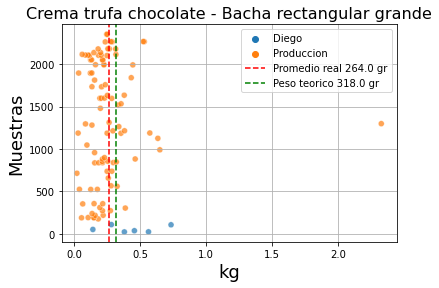

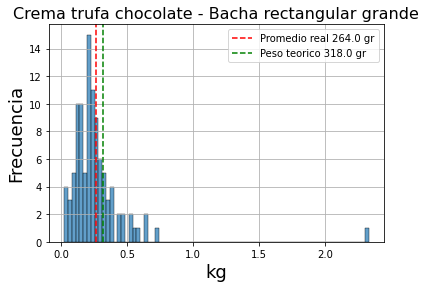

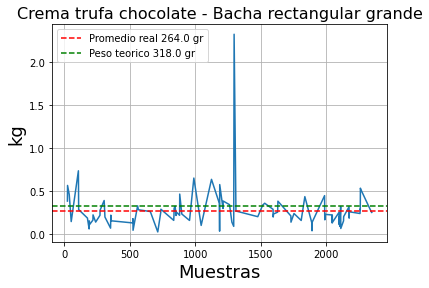

In [18]:
M13 = Grafico(df, 'Bacha rectangular grande', 'Crema trufa chocolate').graficar()
N13 = Grafico_hist(df, 'Bacha rectangular grande', 'Crema trufa chocolate').graficar_hist()
L13 = Grafico_lineal(df, 'Bacha rectangular grande', 'Crema trufa chocolate').graficar_lin()

Cantidad de muestras: 73 - Min: 0.041 kg - Max: 4.078 kg


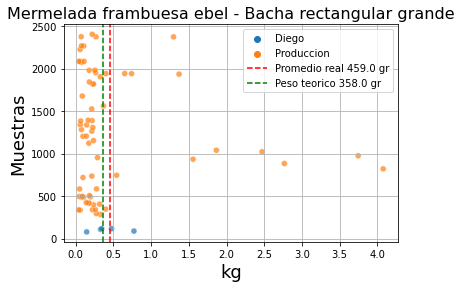

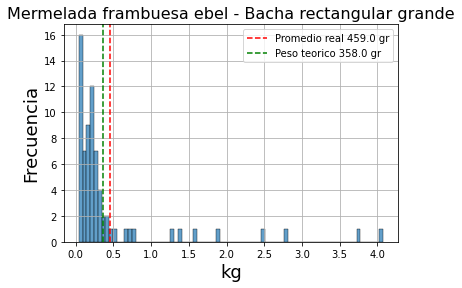

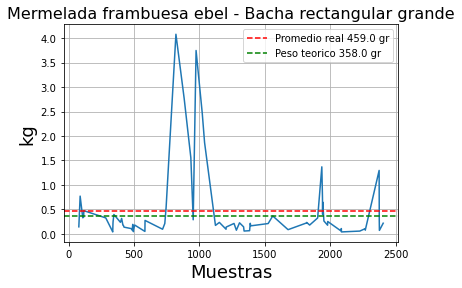

In [19]:
M14 = Grafico(df, 'Bacha rectangular grande', 'Mermelada frambuesa ebel').graficar()
N14 = Grafico_hist(df, 'Bacha rectangular grande', 'Mermelada frambuesa ebel').graficar_hist()
L14 = Grafico_lineal(df, 'Bacha rectangular grande', 'Mermelada frambuesa ebel').graficar_lin()

Cantidad de muestras: 40 - Min: 0.012 kg - Max: 1.332 kg


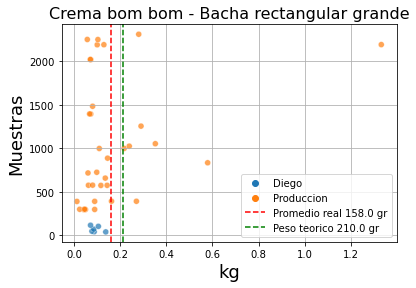

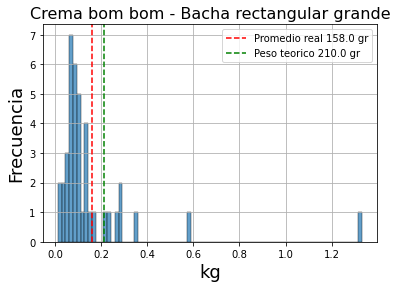

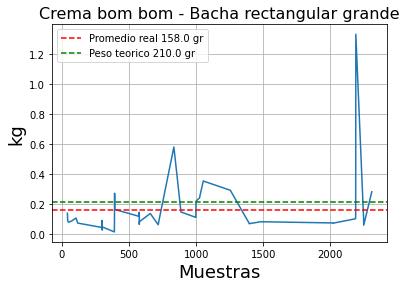

In [20]:
M15 = Grafico(df, 'Bacha rectangular grande', 'Crema bom bom').graficar()
N15 = Grafico_hist(df, 'Bacha rectangular grande', 'Crema bom bom').graficar_hist()
L15 = Grafico_lineal(df, 'Bacha rectangular grande', 'Crema bom bom').graficar_lin()

Cantidad de muestras: 1 - Min: 0.54 kg - Max: 0.54 kg


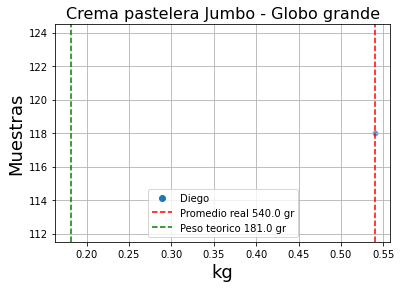

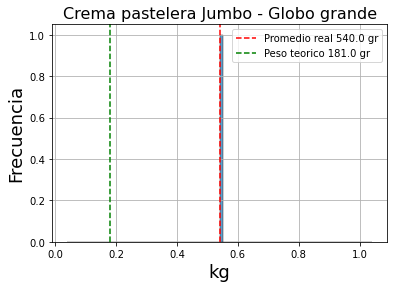

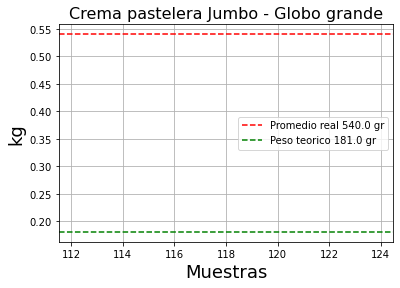

In [21]:
M16 = Grafico(df, 'Globo grande', 'Crema pastelera Jumbo').graficar()
N17 = Grafico_hist(df, 'Globo grande', 'Crema pastelera Jumbo').graficar_hist()
L17 = Grafico_lineal(df, 'Globo grande', 'Crema pastelera Jumbo').graficar_lin()

Cantidad de muestras: 59 - Min: 0.006 kg - Max: 1.72 kg


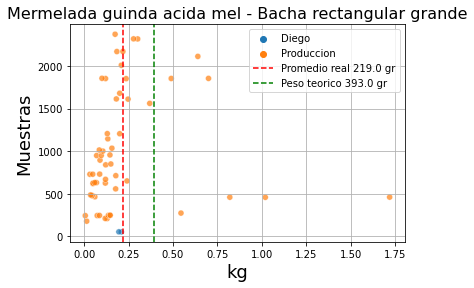

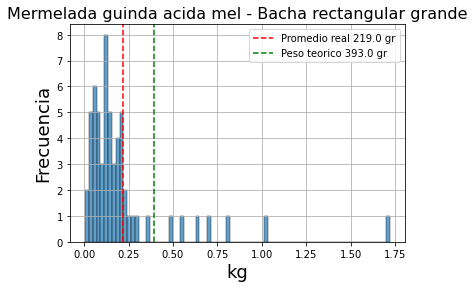

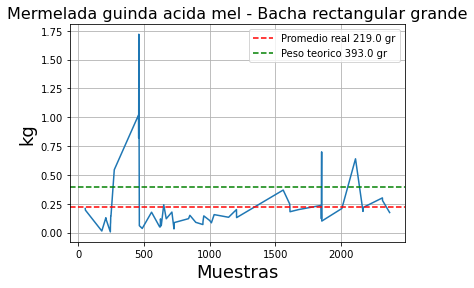

In [22]:
M17 = Grafico(df, 'Bacha rectangular grande', 'Mermelada guinda acida mel').graficar()
N17 = Grafico_hist(df, 'Bacha rectangular grande', 'Mermelada guinda acida mel').graficar_hist()
L17 = Grafico_lineal(df, 'Bacha rectangular grande', 'Mermelada guinda acida mel').graficar_lin()

Cantidad de muestras: 127 - Min: 0.012 kg - Max: 0.919 kg


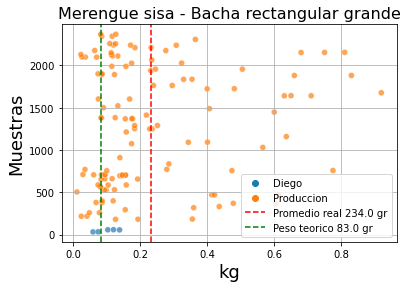

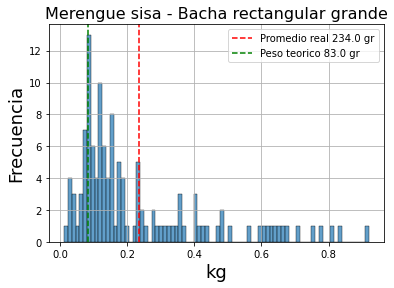

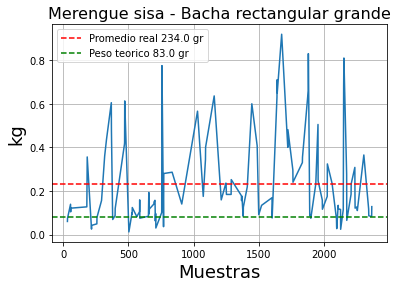

In [23]:
M18 = Grafico(df, 'Bacha rectangular grande', 'Merengue sisa').graficar()
N18 = Grafico_hist(df, 'Bacha rectangular grande', 'Merengue sisa').graficar_hist()
L18 = Grafico_lineal(df, 'Bacha rectangular grande', 'Merengue sisa').graficar_lin()

Cantidad de muestras: 24 - Min: 0.018 kg - Max: 1.0 kg


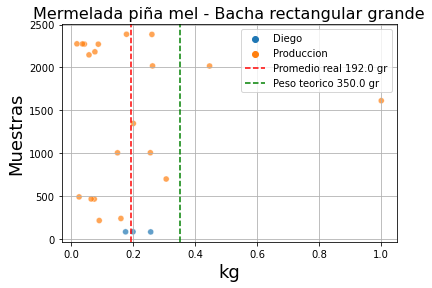

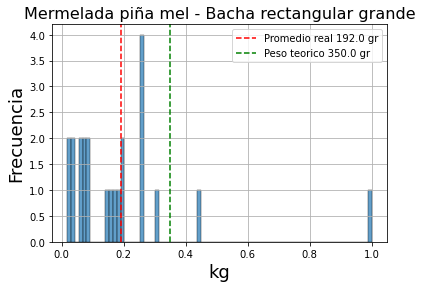

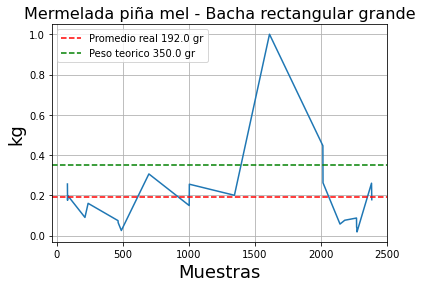

In [24]:
M19 = Grafico(df, 'Bacha rectangular grande', 'Mermelada piña mel').graficar()
N19 = Grafico_hist(df, 'Bacha rectangular grande', 'Mermelada piña mel').graficar_hist()
L19 = Grafico_lineal(df, 'Bacha rectangular grande', 'Mermelada piña mel').graficar_lin()

Cantidad de muestras: 7 - Min: 0.3 kg - Max: 2.0 kg


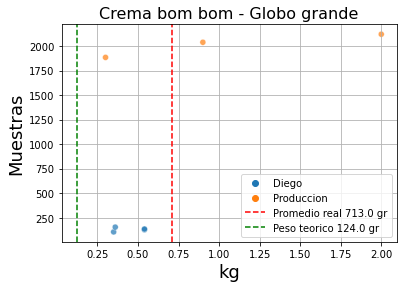

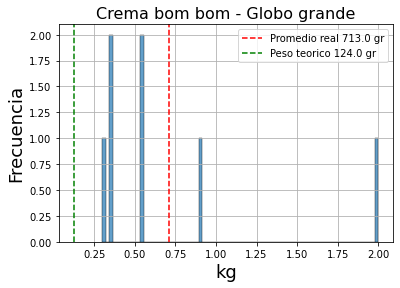

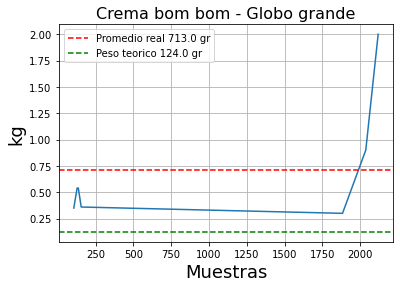

In [25]:
M20 = Grafico(df, 'Globo grande', 'Crema bom bom').graficar()
N20 = Grafico_hist(df, 'Globo grande', 'Crema bom bom').graficar_hist()
L20 = Grafico_lineal(df, 'Globo grande', 'Crema bom bom').graficar_lin()

Cantidad de muestras: 111 - Min: 0.004 kg - Max: 0.507 kg


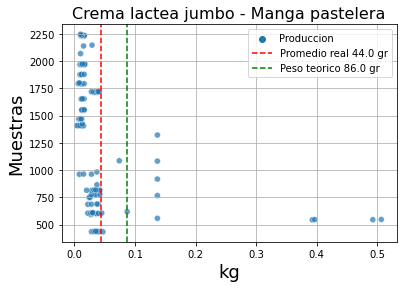

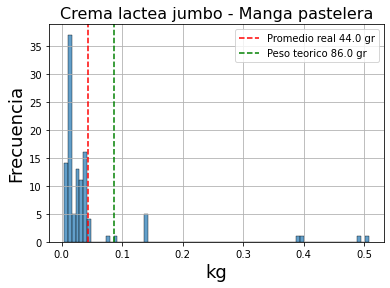

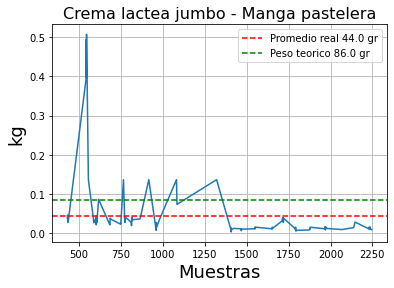

In [26]:
M21 = Grafico(df, 'Manga pastelera', 'Crema lactea jumbo').graficar()
N21 = Grafico_hist(df, 'Manga pastelera', 'Crema lactea jumbo').graficar_hist()
L21 = Grafico_lineal(df, 'Manga pastelera', 'Crema lactea jumbo').graficar_lin()

Cantidad de muestras: 45 - Min: 0.008 kg - Max: 0.137 kg


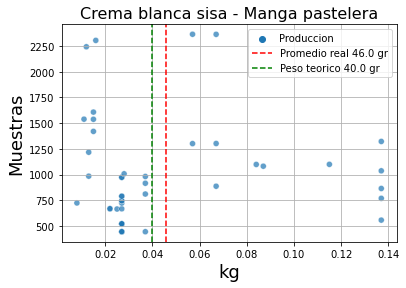

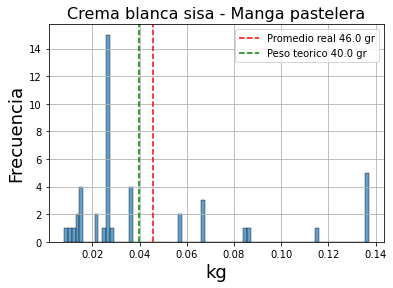

In [27]:
M22 = Grafico(df, 'Manga pastelera', 'Crema blanca sisa').graficar()
N22 = Grafico_hist(df, 'Manga pastelera', 'Crema blanca sisa').graficar_hist()
L22 = Grafico_lineal(df, 'Manga pastelera', 'Crema blanca sisa').graficar_lin()

In [28]:
M23 = Grafico(df, 'Bacha rectangular grande', 'Crema mocaccino sisa').graficar()

Cantidad de muestras: 31 - Min: 0.007 kg - Max: 0.67 kg


In [29]:
M24 = Grafico(df, 'Bacha rectangular grande', 'Crema frambuesa sisa').graficar()

Cantidad de muestras: 34 - Min: 0.022 kg - Max: 0.545 kg


Cantidad de muestras: 24 - Min: 0.016 kg - Max: 0.298 kg


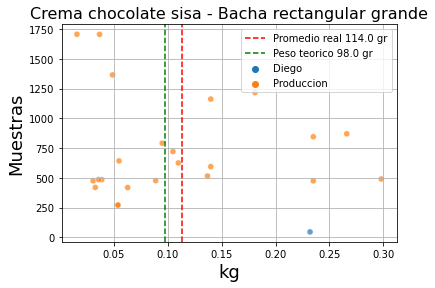

In [30]:
M25 = Grafico(df, 'Bacha rectangular grande', 'Crema chocolate sisa').graficar()

Cantidad de muestras: 37 - Min: 0.036 kg - Max: 1.375 kg


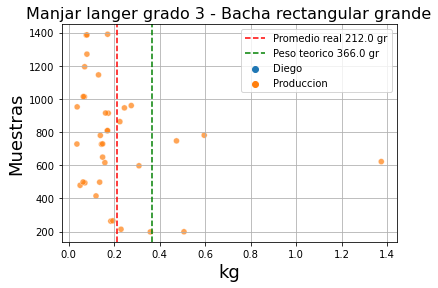

In [31]:
M26 = Grafico(df, 'Bacha rectangular grande', 'Manjar langer grado 3').graficar()

In [32]:
M27 = Grafico(df, 'Balde 4,5 kg', 'Pure lucuma').graficar()

Cantidad de muestras: 5 - Min: 0.042 kg - Max: 0.871 kg
